In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scvi
import seaborn as sb
import anndata

This notebook entails the preprocessing for all used datasets. Each dataset is supposed to run independently. The notebook is not intended to run from the beginning to the end in one run.

# Pauli et al. (GSE247238)

got pre-processed by collaborators in Seurat with nFeature_RNA > 200 & nFeature_RNA < 10000 & nCount_RNA > 1000 & nCount_RNA < 50000 & percent.mt < 20

In [4]:
annotations = np.load("../data/Plaque-datasets/Lars_Roche2/annotation.npy") # provided by expert collaborator

In [5]:
annotations

array(['CD8 T', 'Inf MΦ', 'Proliferating cells', ...,
       'Proliferating cells', 'Inf MΦ', 'Proliferating cells'],
      dtype='<U19')

In [6]:
df = pd.read_csv("../data/Plaque-datasets/Lars_Roche2/munich.count_matrix.txt", sep = "\t")

In [7]:
df.set_index('gene_symbol', inplace=True)

In [8]:
barcode_series = df.columns 

In [9]:
adata = anndata.AnnData(X=df.T)

In [75]:
samples = [barcode[:7] for barcode in barcode_series]

In [76]:
len(np.unique(samples, return_counts=True)[0])

16

In [13]:
adata.obs["cell_type"] = annotations

In [11]:
adata.obs['dataset'] = 'Roche2'

In [15]:
adata.write("../data/Plaque-datasets/Lars_Roche2/munichraw_annot.h5ad")

In [2]:
roche2 = sc.read_h5ad("../data/Plaque-datasets/Lars_Roche2/munichraw_annot.h5ad")
roche2.var['mt'] = roche2.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(roche2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


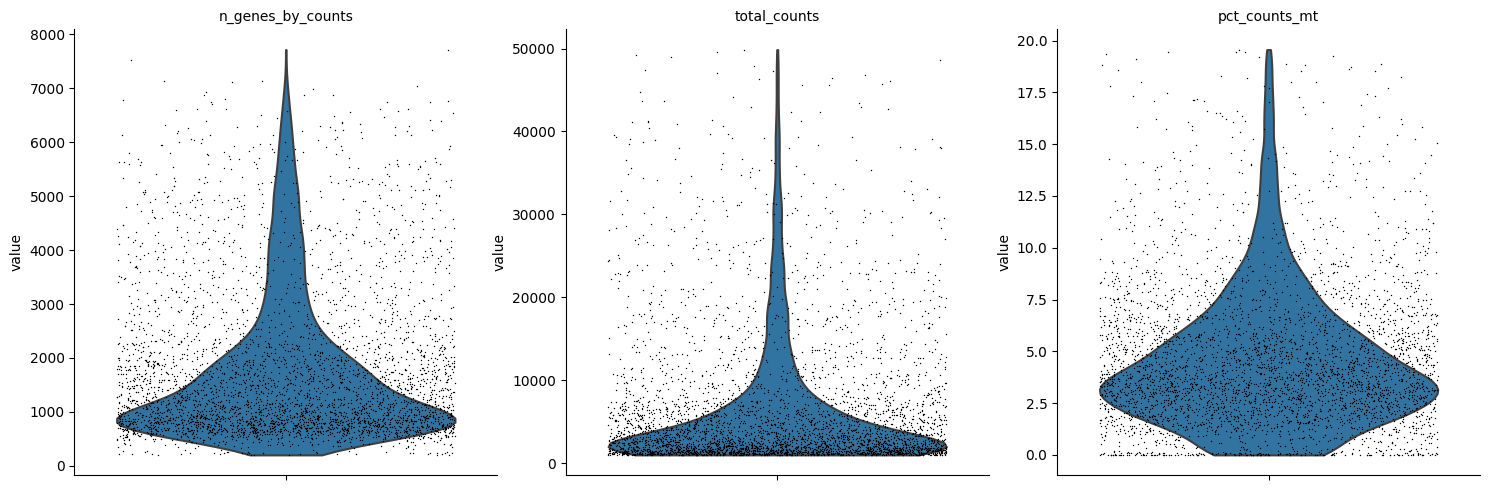

In [4]:
sc.pl.violin(roche2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [17]:
roche2.obs.index.str[6]

Index(['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h',
       ...
       'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd'],
      dtype='object', length=4050)

In [14]:
# extract sample id from barcode and put it in new sample column
roche2.obs['sample'] = roche2.obs.index.str[4]

In [18]:
# only keep the samples where the 6th element of the index is a d
roche2 = roche2[roche2.obs.index.str[6] == 'd']

In [21]:
# rename the dataset column elements to Roche
roche2.obs['dataset'] = 'Roche'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_68868/1055842169.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  roche2.obs['dataset'] = 'Roche'


In [22]:
roche2.obs

,dataset,cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample
car02_d_AAATGGATCGAGTGGA.1,Roche,CD8 T,647,1273,78,6.127258,2
car02_d_AAGGAATGTCGTTGGC.1,Roche,Inf MΦ,2881,9727,1564,16.078955,2
car02_d_AATGGCTTCTTCCAGC.1,Roche,TREM2 MΦ,4906,43494,3031,6.968777,2
car02_d_ACCTACCGTTTACTGG.1,Roche,Plasma cell,335,8015,3,0.037430,2
car02_d_ACCTGAAGTCATCCCT.1,Roche,Mast cell,1113,2843,219,7.703130,2
...,...,...,...,...,...,...,...
car09_d_TTGTTTGCACGCTGTG.1,Roche,EC A,1154,2085,55,2.637890,9
car09_d_TTTACCAAGGCGTTGA.1,Roche,CD4 T,775,1641,132,8.043876,9
car09_d_TTTACTGAGCGTGTCC.1,Roche,Proliferating cells,1422,20991,217,1.033776,9
car09_d_TTTCAGTTCTCCACTG.1,Roche,Inf MΦ,1791,4758,123,2.585120,9


In [23]:
roche2.write("../data/Plaque-datasets/Lars_Roche2/Roche_new.h5ad")

In [ ]:
roche2

In [2]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [3]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Lars_Roche2/Roche_new.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Lars_Roche2/Roche_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [4]:
adata_final = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Lars_Roche2/Roche_postR.h5ad")

In [8]:
adata_final.layers["uncorrected_counts"] = adata_final.X.copy()
adata_final.layers["raw_decontXcounts"] = adata_final.layers["decontXcounts"].copy()
adata_final.X = np.around(adata_final.layers["raw_decontXcounts"].copy()).astype(int)
del adata_final.layers["decontXcounts"]

In [10]:
adata_final.obs

,dataset,cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample,scDblFinder.sample,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,decontX_contamination,decontX_clusters
car02_d_AAATGGATCGAGTGGA.1,Roche,CD8 T,647.0,1273.0,78.0,6.127258,2,2,singlet,0.507475,1.000000,0.014949,0.000529,2-1
car02_d_AAGGAATGTCGTTGGC.1,Roche,Inf MΦ,2881.0,9727.0,1564.0,16.078955,2,2,singlet,0.563011,1.000000,0.126022,0.024352,2-2
car02_d_AATGGCTTCTTCCAGC.1,Roche,TREM2 MΦ,4906.0,43494.0,3031.0,6.968777,2,2,doublet,0.675130,0.973690,0.390259,0.000323,2-2
car02_d_ACCTACCGTTTACTGG.1,Roche,Plasma cell,335.0,8015.0,3.0,0.037430,2,2,singlet,0.501177,1.000000,0.002354,0.000003,2-2
car02_d_ACCTGAAGTCATCCCT.1,Roche,Mast cell,1113.0,2843.0,219.0,7.703130,2,2,singlet,0.520772,1.000000,0.041544,0.753178,2-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
car09_d_TTGTTTGCACGCTGTG.1,Roche,EC A,1154.0,2085.0,55.0,2.637890,9,9,singlet,0.439140,0.958970,0.158334,0.038544,9-2
car09_d_TTTACCAAGGCGTTGA.1,Roche,CD4 T,775.0,1641.0,132.0,8.043876,9,9,singlet,0.106232,0.907362,0.008969,0.000450,9-1
car09_d_TTTACTGAGCGTGTCC.1,Roche,Proliferating cells,1422.0,20991.0,217.0,1.033776,9,9,singlet,0.473998,0.917750,0.041485,0.118686,9-7
car09_d_TTTCAGTTCTCCACTG.1,Roche,Inf MΦ,1791.0,4758.0,123.0,2.585120,9,9,singlet,0.600202,0.942284,0.088722,0.000173,9-6


In [11]:
adata_final.write_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Lars_Roche2/Roche_postQC.h5ad")

# Fernandez et al. (GSE224273)

In [ ]:
path = "../data/Plaque-datasets/Fernandez/GSE224273/GSE224273_RAW/"

# List to store all AnnData objects
adata_list = []

# Start the sample_id at 1
sample_id = 1

for sample in ["1", "2", "3", "3A", "4", "5", "6"]:
    #print(sample)
    
    adata_sample = sc.read_10x_mtx(path + "Sample" + str(sample), var_names='gene_symbols')
    print("Number of cells in sample {}: {}".format(sample, len(adata_sample.obs)))
    # Update barcodes with sample ID
    adata_sample.obs_names = [barcode + "_" + str(sample) for barcode in adata_sample.obs_names]
    adata_sample.obs["sample"] = str(sample)
    adata_list.append(adata_sample)

# Concatenate all AnnData objects in the list without creating a new label
adata_final = anndata.concat(adata_list, join='outer', fill_value=0.0)

In [ ]:
# load data that was generated the same way but without sample 6
adata_no6 = sc.read_h5ad("../data/Plaque-datasets/Fernandez/fernandez_counts_raw_no6with3a.h5ad")
# remove surface protein markers from gene list
genes_only_in_final = list(set(adata_final.var_names) - set(adata_no6.var_names))
# remove surface protein markers from final dataset
adata_final = adata_final[:, [gene for gene in adata_final.var_names if gene not in genes_only_in_final]].copy()
# check if adata_final.var_names and adata_no6.var_names are the same
set(adata_final.var_names) == set(adata_no6.var_names)

In [ ]:
adata_final.write("../data/Plaque-datasets/Fernandez/fernandez_counts_raw_noCITE.h5ad")

In [4]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [ ]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Fernandez/fernandez_counts_raw_noCITE.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Fernandez/fernandez_postR_noCITE.h5ad")

In [34]:
adata_final = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Fernandez/fernandez_postR_noCITE.h5ad")

In [35]:
adata_final.layers["uncorrected_counts"] = adata_final.X.copy()
adata_final.layers["raw_decontXcounts"] = adata_final.layers["decontXcounts"].copy()
adata_final.X = np.around(adata_final.layers["raw_decontXcounts"].copy()).astype(int)
del adata_final.layers["decontXcounts"]

In [50]:
adata_final.var['mt'] = adata_final.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_final, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [57]:
sc.pp.filter_cells(adata_final, min_genes=0) # to get n_genes

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


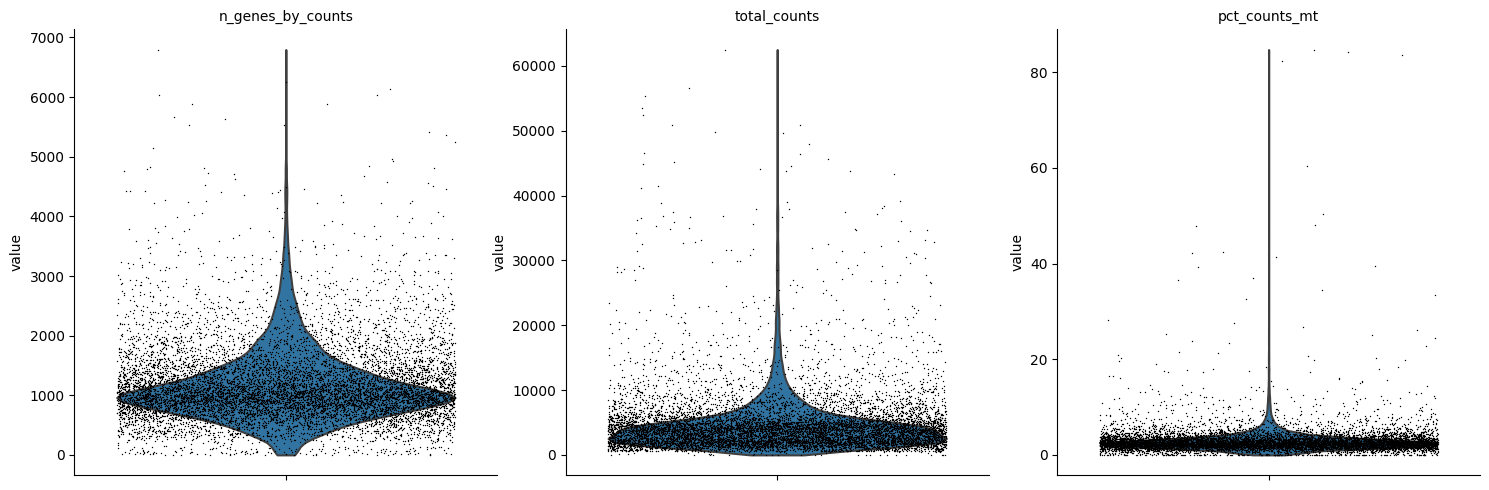

In [51]:
sc.pl.violin(adata_final, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

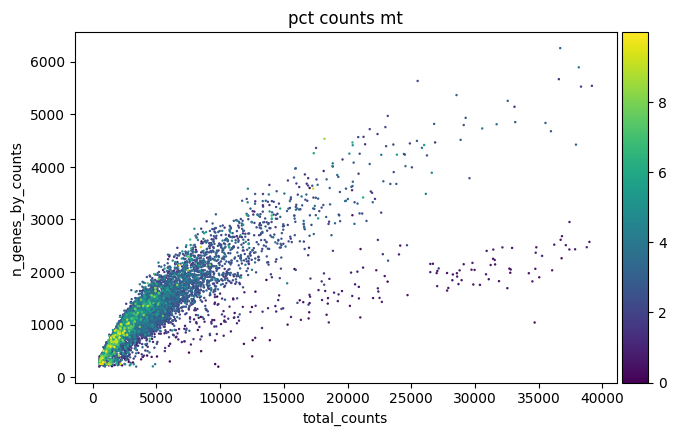

In [72]:
sc.pl.scatter(adata_final, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

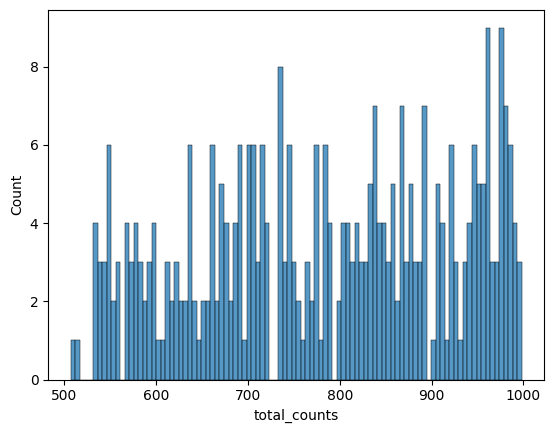

In [71]:
p1 = sb.histplot(adata_final.obs['total_counts'][adata_final.obs['total_counts']<1000], kde=False, bins=100) #max_counts = 40000, min_counts = 500

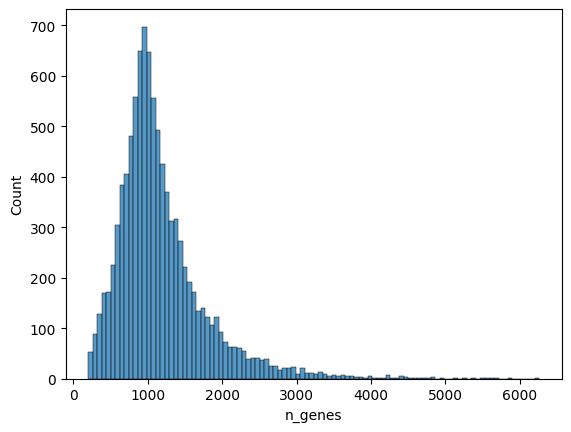

In [70]:
p1 = sb.histplot(adata_final.obs['n_genes'], kde=False, bins=100)

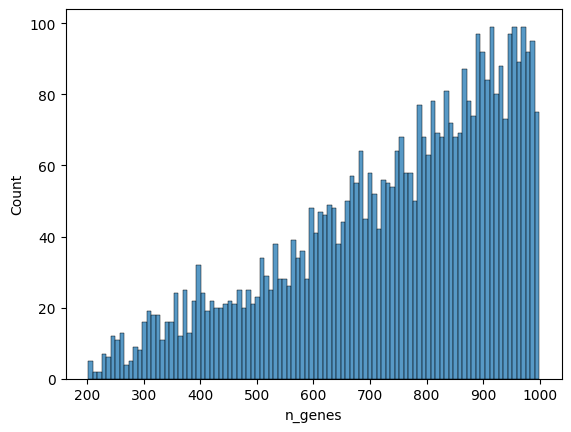

In [69]:
p1 = sb.histplot(adata_final.obs['n_genes'][adata_final.obs['n_genes']<1000], kde=False, bins=100) # min_genes = 200

In [68]:
# my own pp
print('Number of cells before gene filter: {:d}'.format(adata_final.n_obs))
sc.pp.filter_cells(adata_final, min_genes=200)  
sc.pp.filter_genes(adata_final, min_cells=3)

print('Number of cells before counts filter: {:d}'.format(adata_final.n_obs))

sc.pp.filter_cells(adata_final, min_counts = 500)
sc.pp.filter_cells(adata_final, max_counts = 40000)

print('Number of cells beforeMT filter: {:d}'.format(adata_final.n_obs))

adata_final = adata_final[adata_final.obs['pct_counts_mt'] < 10] 
print('Number of cells after MT filter: {:d}'.format(adata_final.n_obs))


Number of cells before gene filter: 10164
Number of cells before counts filter: 9991
Number of cells beforeMT filter: 9967
Number of cells after MT filter: 9844


In [74]:
adata_final.obs['dataset'] = 'Fernandez'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_10709/3616336874.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_final.obs['dataset'] = 'Fernandez'


In [75]:
# add symptom info: sample 1 is SYM, sample2 is ASYM, sample3 is ASYM, sample4 is ASYM, sample5 is ASYM, sample6 is SYM
adata_final.obs['symptoms'] = ['SYM' if sample == '1' or sample == '6' else 'ASYM' for sample in adata_final.obs['sample']]

In [ ]:
#adata_final.obs.drop('symptom', axis=1, inplace=True)

In [79]:
adata_final

AnnData object with n_obs × n_vars = 9844 × 23213
    obs: 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'dataset', 'symptoms'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [25]:
# annotations only for half of the cells and only t cells or macrophages. so not included atm


In [ ]:
adata_final.write("../data/Plaque-datasets/Fernandez/Fernandez_postQC_noCITE.h5ad")

In [2]:
# forgot to apply max counts filters
adata_final = sc.read_h5ad("../data/Plaque-datasets/Fernandez/Fernandez_new.h5ad")

In [14]:
# max counts 40k 
#sc.pp.filter_cells(adata_final, max_counts = 40000)

In [16]:
adata_final.write("../data/Plaque-datasets/Fernandez/Fernandez_new_outer.h5ad")

# Wirka et al. (GSE131778)

All samples come already filtered with those criteria<br>
sc.pp.filter_genes(adata, min_cells=5)<br>
sc.pp.filter_cells(adata, min_genes=500)<br>
sc.pp.filter_cells(adata, max_genes=3500)<br>
adata = adata[adata.obs['pct_counts_mt'] < 7.5]<br>
<br>

In [8]:
adata = sc.read_text("../data/Plaque-datasets/Wirka/GSE131778_human_coronary_scRNAseq_wirka_et_al_GEO.txt")
adata = adata.transpose()

In [9]:
adata

AnnData object with n_obs × n_vars = 11756 × 20431

In [10]:
annotations = np.load("../data/Plaque-datasets/Wirka/cell_types_wirka.npy") # supplied by expert collaborator

In [11]:
adata.obs["cell_type"] = annotations

In [16]:
# get last element of the barcode and put it in a new column
adata.obs["sample"] = adata.obs.index.str[-1]

In [21]:
adata.obs['dataset'] = 'Wirka'

In [22]:
adata.obs

,cell_type,sample,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,dataset
AAACGGGAGGTTCCTA-1,TREM2 MΦ,1,2100,5884.0,88.0,1.495581,Wirka
AAAGATGAGACTCGGA-1,Plasma cell,1,1377,13142.0,97.0,0.738092,Wirka
AAAGATGGTTGGAGGT-1,B cell,1,1548,4013.0,34.0,0.847246,Wirka
AAAGATGTCTACCTGC-1,DC,1,3015,11284.0,116.0,1.028004,Wirka
AAAGCAAAGCCCAACC-1,Inf MΦ,1,2007,5012.0,137.0,2.733440,Wirka
...,...,...,...,...,...,...,...
TTTGGTTCAATTGCTG-8,TREM2 MΦ,8,1653,5122.0,67.0,1.308083,Wirka
TTTGGTTTCTCTGTCG-8,Fibromyocyte,8,3489,14513.0,178.0,1.226487,Wirka
TTTGTCACAAAGTGCG-8,Fibromyocyte,8,2615,9018.0,171.0,1.896208,Wirka
TTTGTCACAGGACCCT-8,Fibromyocyte,8,2084,6162.0,96.0,1.557936,Wirka


In [19]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


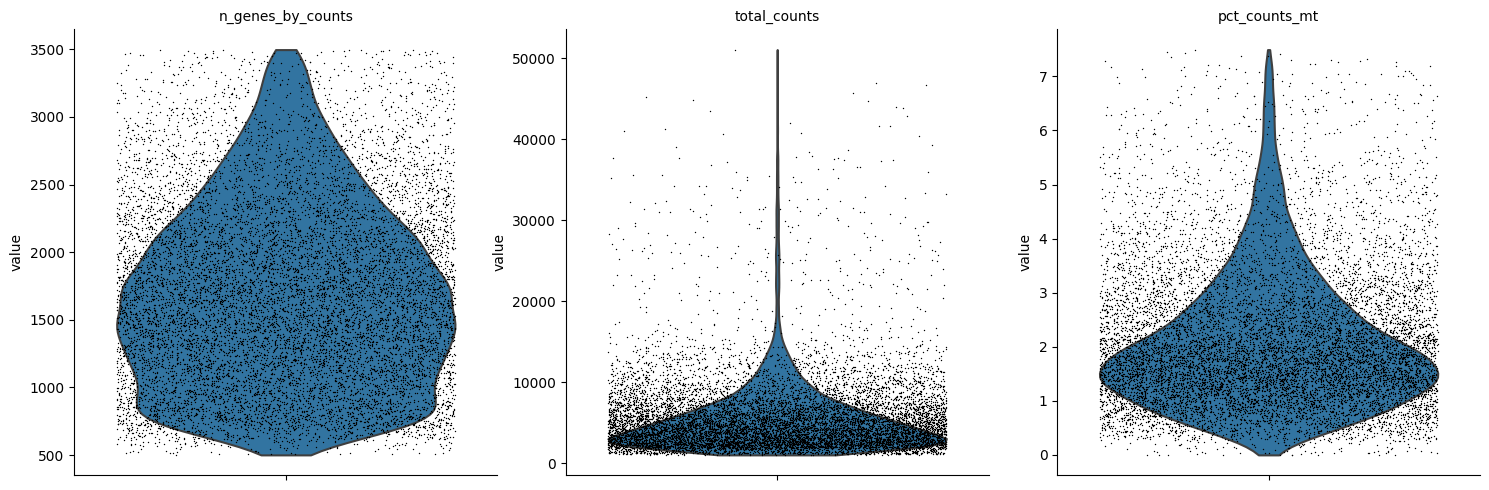

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

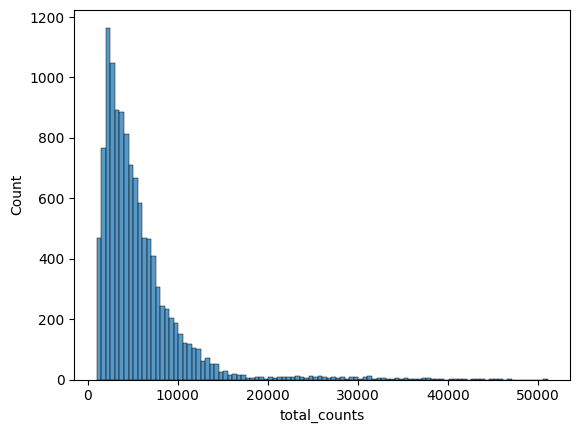

In [142]:
p1 = sb.histplot(adata.obs['total_counts'][adata.obs['total_counts']<100000], kde=False, bins=100)

In [24]:
adata.write("../data/Plaque-datasets/Wirka/Wirka1.h5ad")

In [23]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [25]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Wirka/Wirka1.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Wirka/Wirka_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [3]:
adata_final = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Wirka/Wirka_postR.h5ad")

In [4]:
adata_final.layers["uncorrected_counts"] = adata_final.X.copy()
adata_final.layers["raw_decontXcounts"] = adata_final.layers["decontXcounts"].copy()
adata_final.X = np.around(adata_final.layers["raw_decontXcounts"].copy()).astype(int)
del adata_final.layers["decontXcounts"]

In [7]:
adata_final.obs['symptoms'] = 'not stated'

In [8]:
adata_final

AnnData object with n_obs × n_vars = 11756 × 20431
    obs: 'cell_type', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'symptoms'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP', 'decontX_7_UMAP', 'decontX_8_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [9]:
adata_final.write("../data/Plaque-datasets/Wirka/Wirka_postQC.h5ad")

# Emoto et al. (GSE184073)

In [1]:
# annotations from rds files

In [2]:
cell_types = np.load("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Emoto/cell_types_emoto.npy") # supplied by expert collaborator

In [3]:
barcodes = np.load("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Emoto/barcodes_emoto.npy")

In [4]:
barcode_to_celltype = dict(zip(barcodes, cell_types))

In [5]:
acs_dict = {}
ccs_dict = {}

for key, value in barcode_to_celltype.items():
    if key.startswith('ACS_'):
        acs_dict[key[4:]] = value
    elif key.startswith('CCS_'):
        ccs_dict[key[4:]] = value


did not find any information on QC used in publication. Email send to author. <br>
got supplement. filtered acc to author.

In [6]:
adata = sc.read_10x_mtx(
    '../data/Plaque-datasets/Emoto/GSE184073_RAW/ACS/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=False) 

adata.obs['dataset'] = 'Emoto_ACS'

In [11]:
adata.obs

,dataset,cell_type
AAACCCACAAGCACCC-1,Emoto_ACS,CD4 T
AAACCCACATATAGCC-1,Emoto_ACS,unknown
AAACGAAAGACAGCGT-1,Emoto_ACS,unknown
AAACGAAAGAGCTGAC-1,Emoto_ACS,CD4 T
AAACGAAAGCATTGAA-1,Emoto_ACS,NK
...,...,...
TTTGTTGCAACCGATT-1,Emoto_ACS,TREM2 MΦ
TTTGTTGCACCCTAAA-1,Emoto_ACS,CD4 T
TTTGTTGCATGGATCT-1,Emoto_ACS,CD8 T
TTTGTTGGTACGCGTC-1,Emoto_ACS,unknown


In [8]:
adata.obs['cell_type'] = ''

In [9]:
for barcode in adata.obs.index:
    #print(barcode)
    if barcode in acs_dict:
        #print(barcode)
        cell_type = acs_dict[barcode]
        adata.obs.loc[barcode, 'cell_type'] = cell_type
    else:
        adata.obs.loc[barcode, 'cell_type'] = "unknown"

In [63]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


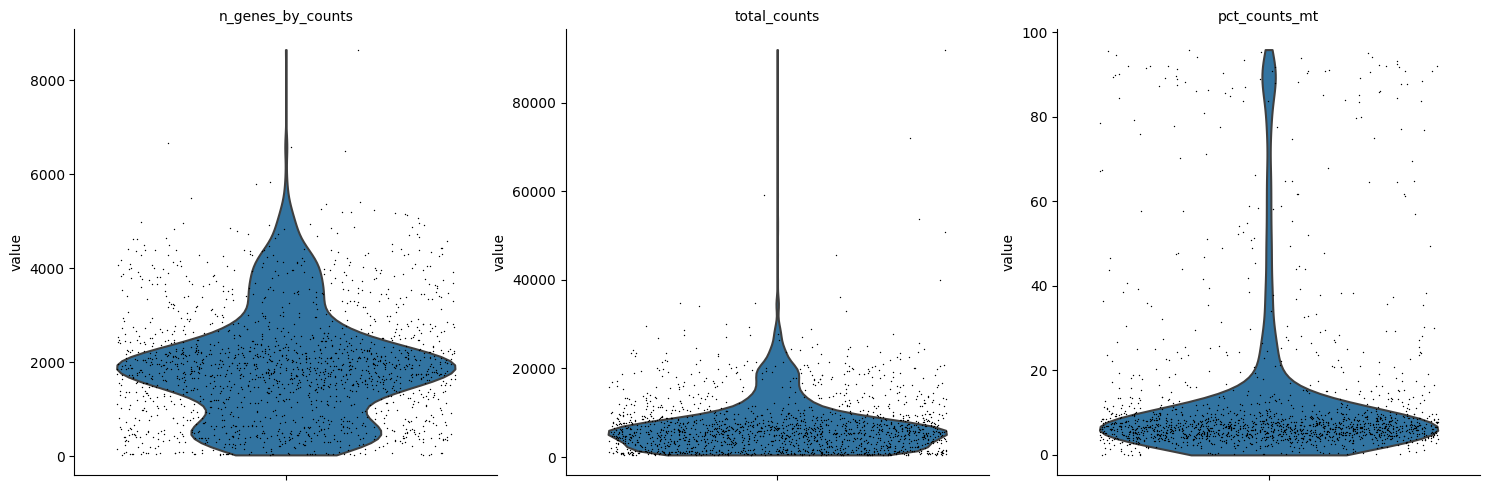

In [5]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [64]:
sc.pp.filter_cells(adata, min_genes=500) # acc to paper
sc.pp.filter_genes(adata, min_cells=3) # acc to paper

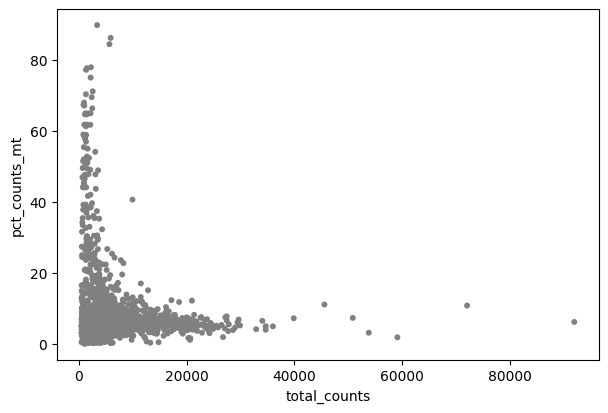

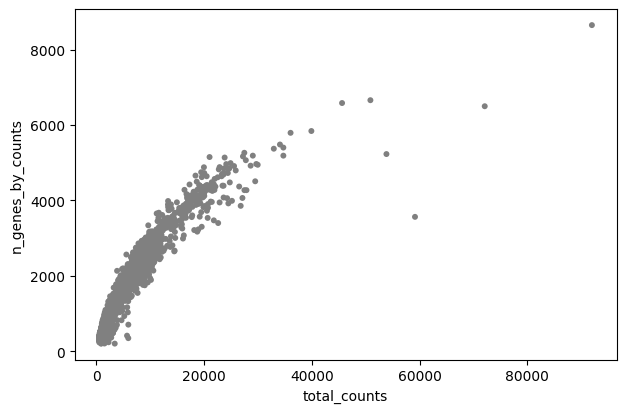

In [119]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

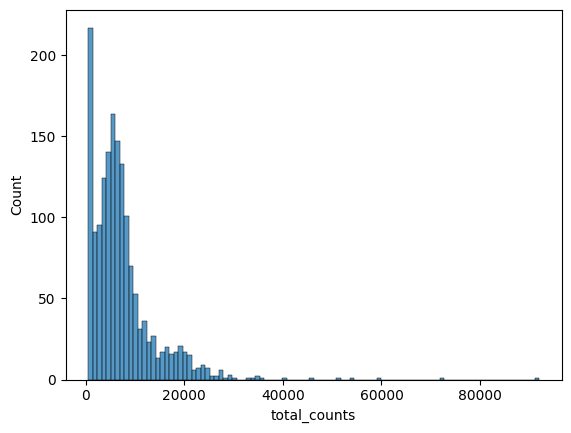

In [128]:
p1 = sb.histplot(adata.obs['total_counts'][adata.obs['total_counts']<100000], kde=False, bins=100)

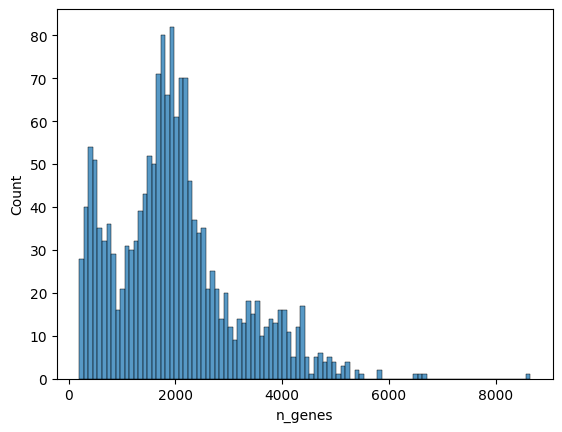

In [129]:
p2 = sb.histplot(adata.obs['n_genes'], kde=False, bins=100)

In [65]:
print('Number of cells before min count filter: {:d}'.format(adata.n_obs))

#sc.pp.filter_cells(adata, min_counts = 1800)
#print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

#sc.pp.filter_cells(adata, max_counts = 40000)
#print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 8] # acc to paper
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

#sc.pp.filter_cells(adata, min_genes = 1000)
#print('Number of cells after min gene filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_genes = 5000) # acc to paper
print('Number of cells after max gene filter: {:d}'.format(adata.n_obs))

Number of cells before min count filter: 1489
Number of cells after MT filter: 1041
Number of cells after max gene filter: 1027


/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [66]:
adata.obs

,dataset,cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes
AAACCCACAAGCACCC-1,Emoto_ACS,CD4 T,3292,15734.0,352.0,2.237193,3287
AAACGAAAGAGCTGAC-1,Emoto_ACS,CD4 T,1585,5726.0,413.0,7.212714,1583
AAAGAACAGTTGAATG-1,Emoto_ACS,CD8 T,984,2259.0,37.0,1.637893,984
AAAGAACCACACACTA-1,Emoto_ACS,unknown,827,1704.0,33.0,1.936620,827
AAAGGATCAACCGTGC-1,Emoto_ACS,Naive B,1746,6542.0,328.0,5.013757,1744
...,...,...,...,...,...,...,...
TTTGGTTTCTCCAAGA-1,Emoto_ACS,CD4 T,2206,7452.0,409.0,5.488460,2204
TTTGTTGCAACCGATT-1,Emoto_ACS,TREM2 MΦ,4390,23392.0,1553.0,6.639022,4380
TTTGTTGCACCCTAAA-1,Emoto_ACS,CD4 T,2378,8280.0,428.0,5.169082,2376
TTTGTTGCATGGATCT-1,Emoto_ACS,CD8 T,2904,9988.0,548.0,5.486584,2901


In [67]:
adata.write("../data/Plaque-datasets/Emoto/GSE184073_RAW/ACS/EmotoACS_annot.h5ad")

In [12]:
adata1 = sc.read_10x_mtx(
    '../data/Plaque-datasets/Emoto/GSE184073_RAW/SAP/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 

adata1.obs['dataset'] = 'Emoto_SAP'

In [13]:
adata1

AnnData object with n_obs × n_vars = 1071 × 36601
    obs: 'dataset'
    var: 'gene_ids', 'feature_types'

In [14]:
adata1.obs['cell_type'] = ''

In [15]:
for barcode in adata1.obs.index:
    #print(barcode)
    if barcode in ccs_dict:
        #print(barcode)
        cell_type = ccs_dict[barcode]
        adata1.obs.loc[barcode, 'cell_type'] = cell_type
    else:
        adata1.obs.loc[barcode, 'cell_type'] = "unknown"

In [16]:
adata1.obs

,dataset,cell_type
AAACCCAAGTGCAGGT-1,Emoto_SAP,CD8 T
AAACCCACAGCTGAAG-1,Emoto_SAP,unknown
AAACCCAGTTGTGGCC-1,Emoto_SAP,CD4 T
AAACGAAAGGTCCGAA-1,Emoto_SAP,unknown
AAACGCTCAACCGTGC-1,Emoto_SAP,CD4 T
...,...,...
TTTGATCCACCAATTG-1,Emoto_SAP,CD8 T
TTTGGAGTCTGGACCG-1,Emoto_SAP,CD4 T
TTTGGTTAGGCCCAAA-1,Emoto_SAP,CD4 T
TTTGGTTAGGGATCGT-1,Emoto_SAP,CD8 T


In [73]:
adata1.var['mt'] = adata1.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


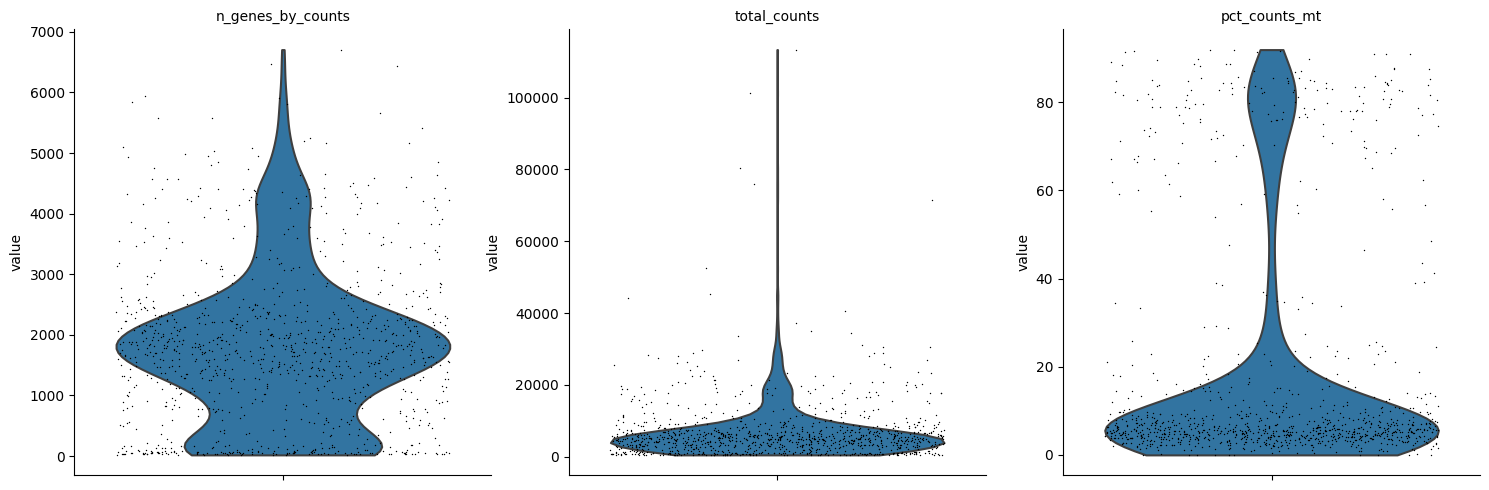

In [12]:
sc.pl.violin(adata1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [74]:
sc.pp.filter_cells(adata1, min_genes=500) # acc to paper
sc.pp.filter_genes(adata1, min_cells=3) # acc to paper

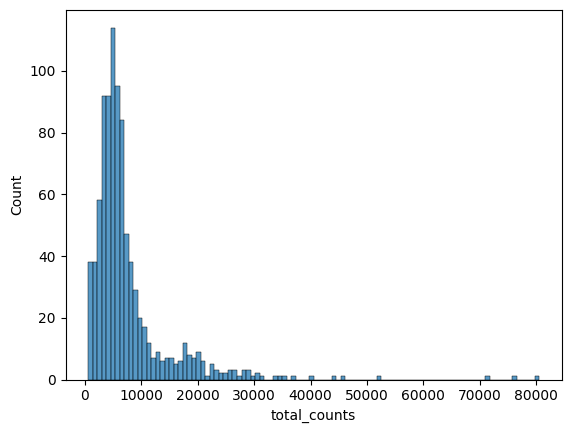

In [133]:
p1 = sb.histplot(adata1.obs['total_counts'][adata1.obs['total_counts']<100000], kde=False, bins=100)

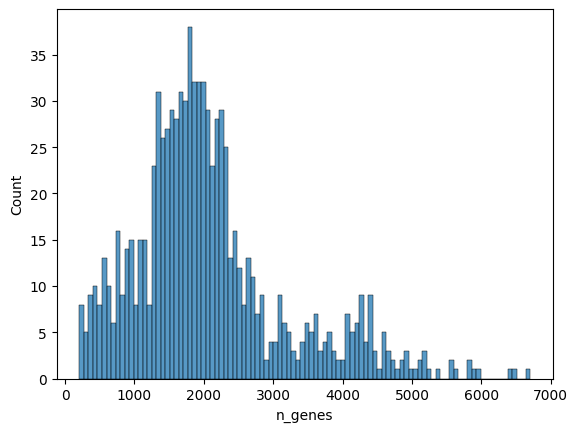

In [134]:
p2 = sb.histplot(adata1.obs['n_genes'], kde=False, bins=100)

In [75]:
print('Number of cells before min count filter: {:d}'.format(adata1.n_obs))

#sc.pp.filter_cells(adata1, min_counts = 1800)
#print('Number of cells after min count filter: {:d}'.format(adata1.n_obs))

#sc.pp.filter_cells(adata1, max_counts = 35000)
#print('Number of cells after max count filter: {:d}'.format(adata1.n_obs))

adata1 = adata1[adata1.obs['pct_counts_mt'] < 8] # acc to paper
print('Number of cells after MT filter: {:d}'.format(adata1.n_obs))

#sc.pp.filter_cells(adata1, min_genes = 1000)
#print('Number of cells after min gene filter: {:d}'.format(adata1.n_obs))

sc.pp.filter_cells(adata1, max_genes = 5000) # acc to paper
print('Number of cells after max gene filter: {:d}'.format(adata1.n_obs))

Number of cells before min count filter: 873
Number of cells after MT filter: 684
Number of cells after max gene filter: 666


/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [76]:
adata1.write("../data/Plaque-datasets/Emoto/GSE184073_RAW/SAP/EmotoSAP_annot.h5ad")

In [3]:
# adjust to new atlas
adata = sc.read_h5ad("../data/Plaque-datasets/Emoto/GSE184073_RAW/ACS/EmotoACS_annot.h5ad")
adata1 = sc.read_h5ad("../data/Plaque-datasets/Emoto/GSE184073_RAW/SAP/EmotoSAP_annot.h5ad")

In [17]:
adata1.obs

,dataset,cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,symptoms,sample
AAACCCAAGTGCAGGT-1,Emoto_SAP,CD8 T,2116,6898.0,450.0,6.523630,2112,SAP,2
AAACCCAGTTGTGGCC-1,Emoto_SAP,CD4 T,1962,5026.0,2.0,0.039793,1959,SAP,2
AAACGCTCAACCGTGC-1,Emoto_SAP,CD4 T,2226,5604.0,69.0,1.231263,2223,SAP,2
AAAGAACTCTGCTTAT-1,Emoto_SAP,CD8 T,1862,5810.0,449.0,7.728055,1860,SAP,2
AAAGGATCAGTTGCGC-1,Emoto_SAP,CD4 T,1731,4713.0,266.0,5.643963,1726,SAP,2
...,...,...,...,...,...,...,...,...,...
TTTCCTCTCATACAGC-1,Emoto_SAP,TREM2 MΦ,4205,19643.0,988.0,5.029781,4197,SAP,2
TTTGATCCACCAATTG-1,Emoto_SAP,CD8 T,2762,11094.0,706.0,6.363800,2759,SAP,2
TTTGGTTAGGCCCAAA-1,Emoto_SAP,CD4 T,1351,3343.0,54.0,1.615316,1348,SAP,2
TTTGGTTAGGGATCGT-1,Emoto_SAP,CD8 T,1376,3101.0,84.0,2.708804,1374,SAP,2


In [17]:
adata.obs['symptoms'] = "ACS"
adata1.obs['symptoms'] = "SAP"


In [18]:
adata.obs['sample'] = "1"
adata1.obs['sample'] = "2"

In [15]:
adata

AnnData object with n_obs × n_vars = 1027 × 17781
    obs: 'dataset', 'cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'symptoms', 'sample'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [16]:
adata1

AnnData object with n_obs × n_vars = 666 × 16387
    obs: 'dataset', 'cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'symptoms', 'sample'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [19]:
# concat both datasets
adata_final = anndata.concat([adata, adata1], join='outer', fill_value=0.0)

In [20]:
adata_final

AnnData object with n_obs × n_vars = 2791 × 36601
    obs: 'dataset', 'cell_type', 'symptoms', 'sample'

In [21]:
adata_final.write("../data/Plaque-datasets/Emoto/Emoto.h5ad") #Emoto.h5ad not filtered yet. only used adatas before filtering

In [22]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [23]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Emoto/Emoto.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Emoto/Emoto_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [2]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Emoto/Emoto_postR.h5ad")

In [18]:
adata

AnnData object with n_obs × n_vars = 2791 × 36601
    obs: 'dataset', 'cell_type', 'symptoms', 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP'
    layers: 'decontXcounts'

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

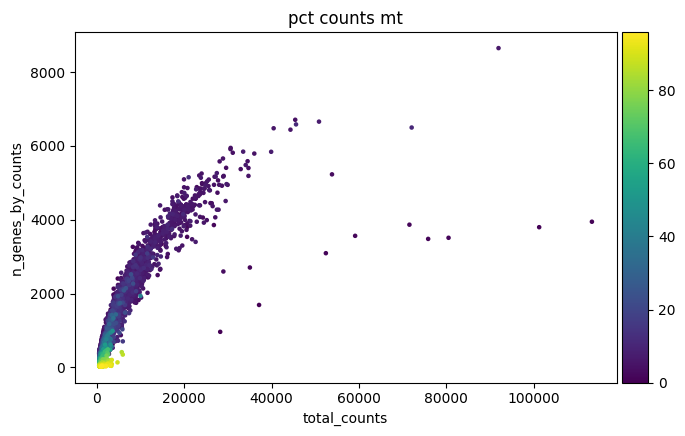

In [6]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


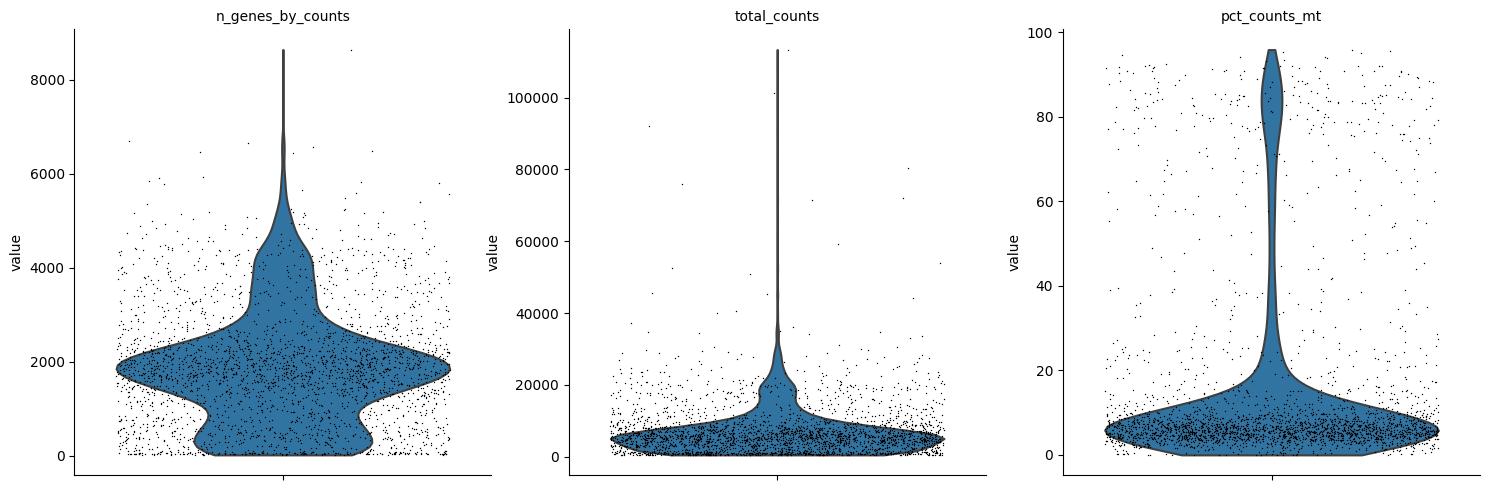

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [8]:
sc.pp.filter_cells(adata, min_genes=0) # to get n_genes

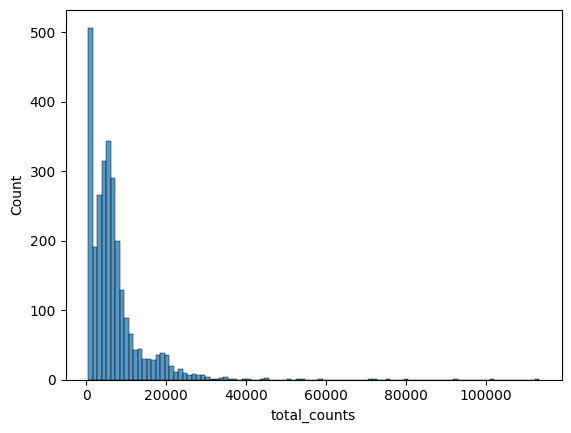

In [11]:
p1 = sb.histplot(adata.obs['total_counts'][adata.obs['total_counts']>0], kde=False, bins=100) 

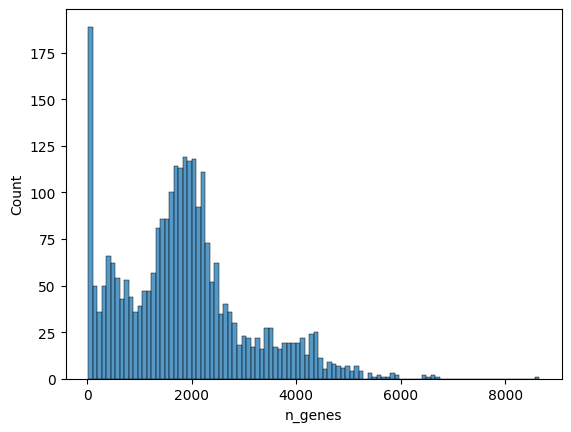

In [19]:
p1 = sb.histplot(adata.obs['n_genes'], kde=False, bins=100)

In [20]:
print('Number of cells before gene filter: {:d}'.format(adata.n_obs))
sc.pp.filter_cells(adata, min_genes=500) # acc to paper
sc.pp.filter_cells(adata, max_genes=5000)  # acc to paper
sc.pp.filter_genes(adata, min_cells=3) # acc to paper

print('Number of cells beforeMT filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 8] # acc to paper
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Number of cells before gene filter: 2791
Number of cells beforeMT filter: 2327
Number of cells after MT filter: 1693


In [21]:
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

In [22]:
adata

AnnData object with n_obs × n_vars = 1693 × 19026
    obs: 'dataset', 'cell_type', 'symptoms', 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [24]:
adata.write("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Emoto/Emoto_postQC.h5ad")

# Chowdhury et al. (GSE196943)

All samples come already filtered with those criteria<br>
sc.pp.filter_genes(adata, min_cells=5)<br>
adata = adata[adata.obs['pct_counts_mt'] < 38]<br>
<br>
v2 samples:<br>
sc.pp.filter_cells(adata, min_genes=300)<br>
sc.pp.filter_cells(adata, max_counts = 15000)<br>
<br>
v3 samples:<br>
sc.pp.filter_cells(adata, min_genes=500)<br>
sc.pp.filter_cells(adata, max_counts = 20000)<br>

In [4]:
adata = sc.read_text("../data/Plaque-datasets/Chowdhury/GSE196943_counts_matrix.txt")
adata = adata.transpose()

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
# the dublicates do not have the same expression. Hence okay to make them unique.
adata.obs_names_make_unique()

In [3]:
# only done when obs not yet unique
# get number of unique barcodes
print(len(adata.obs.index))
print(len(np.unique(adata.obs.index)))

# get me the barcodes that are not unique and their counts
unique, counts = np.unique(adata.obs.index, return_counts=True)
print(unique[counts>1])


26352
26336
['ACCTTTATCGAATGGG_A_plaque' 'ACGGCCACACAGATTC_B_plaque'
 'ATCTGCCCACGAAGCA_A_plaque' 'CAGCAGCGTGTGGTTT_B_plaque'
 'CATATTCTCTAACCGA_B_plaque' 'CCACCTAAGAAACGCC_A_plaque'
 'CCTTCGAGTGTCTGAT_B_plaque' 'CGATCGGTCGTTTAGG_B_plaque'
 'CGCCAAGCAGGTCCAC_B_plaque' 'GGAAAGCTCACGCATA_B_plaque'
 'GGACATTTCTTGCAAG_A_plaque' 'GGACGTCAGGTGCTAG_B_plaque'
 'GGGTCTGCACGGATAG_A_plaque' 'GTAACGTCATGCTAGT_B_plaque'
 'TTAACTCGTGTGCGTC_B_plaque' 'TTTGCGCGTGGTACAG_B_plaque']


In [4]:
# show all data from barcode ACCTTTATCGAATGGG_A_plaque
doublet = adata[adata.obs.index == 'ACCTTTATCGAATGGG_A_plaque']

In [6]:
# check if expressions from doublet are the same
print(np.sum(doublet.X[0]))
print(np.sum(doublet.X[1]))

1858.0
1806.0


In [5]:
# get index of barcodes "ACCTTTATCGAATGGG_A_plaque" 
doublet_index = np.where(adata.obs.index == 'ACCTTTATCGAATGGG_A_plaque')[0]

In [8]:
# get barcodes of doublet_index
adata.obs.index[doublet_index]

Index(['ACCTTTATCGAATGGG_A_plaque', 'ACCTTTATCGAATGGG_A_plaque-1'], dtype='object')

In [9]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [18]:
plaque_mask = ['_plaque' in obs_name for obs_name in adata.obs.index]
blood_mask = ['_blood' in obs_name for obs_name in adata.obs.index]

In [19]:
plaque_adata = adata[plaque_mask, :].copy()
blood_adata = adata[blood_mask, :].copy()

In [31]:
plaque_adata.obs['dataset'] = 'Chowdhury'

In [103]:
blood_adata.obs['dataset'] = 'Chowdhury_blood'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_9890/1262839318.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  blood_adata.obs['dataset'] = 'Chowdhury_blood'


/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


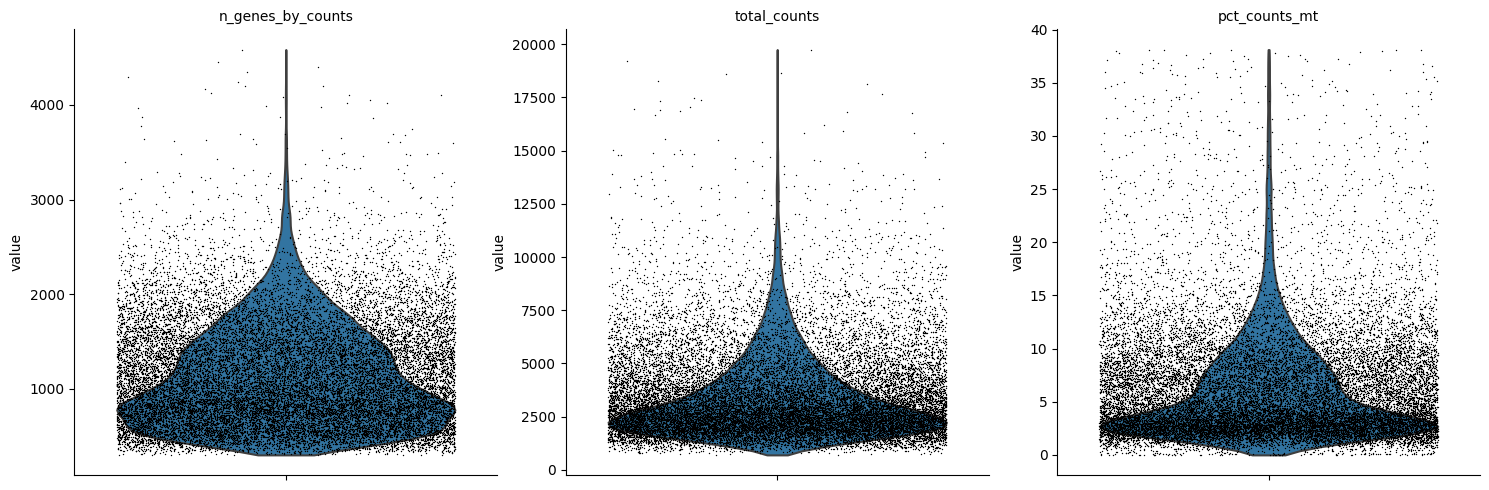

In [74]:
sc.pl.violin(plaque_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [27]:
plaque_adata.obs["sample"].value_counts()

sample
B    5233
A    3912
E    3632
F    3367
L    1956
D    1564
C    1121
J     651
K     529
H     522
I     386
G     145
Name: count, dtype: int64

In [28]:
# append sample obs to plaque_adata
plaque_adata.obs["sample"] = [barcode.split("_")[1] for barcode in plaque_adata.obs.index]
#change sample names from alphabetic to numeric
dict_sample = {'A': '1', 'B': '2', 'C': '3', 'D': '4', 'E': '5', 'F':'6', 'G':'7', 'H':'8', 'I':'9', 'J':'10', 'K':'11', 'L':'12'}
plaque_adata.obs["sample"] = plaque_adata.obs["sample"].map(dict_sample)

In [33]:
plaque_adata.obs["symptoms"] = "not stated" #suppl tables, but did not find info on CAD status

In [34]:
plaque_adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,dataset,sample,symptoms
AAACCTGCATCCGTGG_C_plaque,1560,5171.0,124.0,2.397989,Chowdhury,3,not stated
AAACCTGGTTGTTTGG_C_plaque,1109,3025.0,72.0,2.380165,Chowdhury,3,not stated
AAACGGGAGTATGACA_C_plaque,1170,3656.0,131.0,3.583151,Chowdhury,3,not stated
AAAGATGAGACAGGCT_C_plaque,744,2471.0,107.0,4.330231,Chowdhury,3,not stated
AAAGATGAGAGATGAG_C_plaque,986,2560.0,82.0,3.203125,Chowdhury,3,not stated
...,...,...,...,...,...,...,...
GACCTGGGTCTTCAAG_H_plaque,752,2992.0,74.0,2.473262,Chowdhury,8,not stated
TGGGCGTTCTTCTGGC_H_plaque,648,2312.0,64.0,2.768166,Chowdhury,8,not stated
GAGCAGATCAGAGGTG_H_plaque,639,2493.0,90.0,3.610108,Chowdhury,8,not stated
GAGTCCGGTTCTGGTA_H_plaque,3322,13907.0,258.0,1.855181,Chowdhury,8,not stated


In [35]:
plaque_adata.write("../data/Plaque-datasets/Chowdhury/Chowdhury.h5ad")

In [106]:
blood_adata.write("../data/Plaque-datasets/Chowdhury/Chowdhury_blood.h5ad")

In [36]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [37]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Chowdhury/Chowdhury.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Chowdhury/Chowdhury_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [38]:
adata_final = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Chowdhury/Chowdhury_postR.h5ad")

In [39]:
adata_final.layers["uncorrected_counts"] = adata_final.X.copy()
adata_final.layers["raw_decontXcounts"] = adata_final.layers["decontXcounts"].copy()
adata_final.X = np.around(adata_final.layers["raw_decontXcounts"].copy()).astype(int)
del adata_final.layers["decontXcounts"]

In [40]:
adata_final

AnnData object with n_obs × n_vars = 23018 × 23858
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'sample', 'symptoms', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_10_UMAP', 'decontX_11_UMAP', 'decontX_12_UMAP', 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP', 'decontX_7_UMAP', 'decontX_8_UMAP', 'decontX_9_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [ ]:
adata_final.write("../data/Plaque-datasets/Chowdhury/Chowdhury_postQC.h5ad")

# Pan et al. (GSE155512)

All 3 samples come already filtered with those criteria<br>

sc.pp.filter_cells(adata1, min_genes=200)<br>
sc.pp.filter_cells(adata1, max_genes = 4000) <br>
sc.pp.filter_cells(adata1, max_counts = 20000)<br>
adata1 = adata1[adata1.obs['pct_counts_mt'] < 10]<br>

SAMPLE1 is SYM, 2 and 3 ASYM

In [27]:
adata1 = sc.read_text("../data/Plaque-datasets/Pan/GSE155512_RAW/GSM4705589_RPE004_matrix.txt")
adata1 = adata1.transpose()

adata1.obs['sample'] = '1'
adata1.obs_names = [barcode + "_" + '1' for barcode in adata1.obs_names]
adata1.obs['symptoms'] = "SYM"

In [28]:
adata1.var['mt'] = adata1.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [29]:
adata1.obs

,sample,symptoms,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCACAAAGGATT_1,1,SYM,2702,8659.0,145.0,1.674558
AAACCCAGTCACCACG_1,1,SYM,3515,13622.0,420.0,3.083248
AAACCCAGTGTGTGGA_1,1,SYM,2466,9092.0,533.0,5.862297
AAACCCATCTTGGTCC_1,1,SYM,2602,7881.0,289.0,3.667047
AAACGAAAGATGTAGT_1,1,SYM,2919,11034.0,361.0,3.271706
...,...,...,...,...,...,...
TTTGGTTCAGGTATGG_1,1,SYM,2479,5874.0,166.0,2.826013
TTTGGTTGTAACAGTA_1,1,SYM,2883,11081.0,499.0,4.503203
TTTGTTGGTACCCAGC_1,1,SYM,2893,8265.0,383.0,4.633999
TTTGTTGGTTAGGAGC_1,1,SYM,2721,9688.0,592.0,6.110652


In [38]:
adata1.write("../data/Plaque-datasets/Pan/GSE155512_RAW/Pan1.h5ad")

In [30]:
adata2 = sc.read_text("../data/Plaque-datasets/Pan/GSE155512_RAW/GSM4705590_RPE005_matrix.txt")
adata2 = adata2.transpose()

adata2.obs['sample'] = '2'
adata2.obs_names = [barcode + "_" + '2' for barcode in adata2.obs_names]
adata2.obs['symptoms'] = "ASYM"

In [31]:
adata2.var['mt'] = adata2.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [22]:
adata2

AnnData object with n_obs × n_vars = 3486 × 17397
    obs: 'sample', 'symptoms', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [39]:
adata2.write("../data/Plaque-datasets/Pan/GSE155512_RAW/Pan2.h5ad")

In [32]:
adata3 = sc.read_text("../data/Plaque-datasets/Pan/GSE155512_RAW/GSM4705591_RPE006_matrix.txt")
adata3 = adata3.transpose()

adata3.obs['sample'] = '3'
adata3.obs_names = [barcode + "_" + '3' for barcode in adata3.obs_names]
adata3.obs['symptoms'] = "ASYM"

In [33]:
adata3.var['mt'] = adata3.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [34]:
adata3

AnnData object with n_obs × n_vars = 2767 × 15687
    obs: 'sample', 'symptoms', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [40]:
adata3.write("../data/Plaque-datasets/Pan/GSE155512_RAW/Pan3.h5ad")

In [35]:
pan_together = anndata.concat([adata1, adata2, adata3], join="outer", fill_value=0.0)
pan_together.obs['dataset'] = 'Pan'

In [40]:
pan_together.X

array([[ 1.,  0.,  3., ...,  0.,  1.,  0.],
       [ 0.,  0., 14., ...,  0.,  4.,  0.],
       [ 0.,  0., 10., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]], dtype=float32)

In [39]:
pan_together.write("../data/Plaque-datasets/Pan/GSE155512_RAW/Pan_new.h5ad")

In [80]:
# ambient RNA correction and doublet detection

In [81]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [82]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Pan/GSE155512_RAW/Pan_new.h5ad")

In [83]:
adata

AnnData object with n_obs × n_vars = 8867 × 17818
    obs: 'sample', 'symptoms', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset'

In [84]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Pan/GSE155512_RAW/Pan_new.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Pan/GSE155512_RAW/Pan_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [85]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Pan/GSE155512_RAW/Pan_postR.h5ad")

In [86]:
adata

AnnData object with n_obs × n_vars = 8867 × 17818
    obs: 'sample', 'symptoms', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP'
    layers: 'decontXcounts'

In [87]:
adata.obs["scDblFinder.class"].value_counts()

scDblFinder.class
singlet    8458
doublet     409
Name: count, dtype: int64

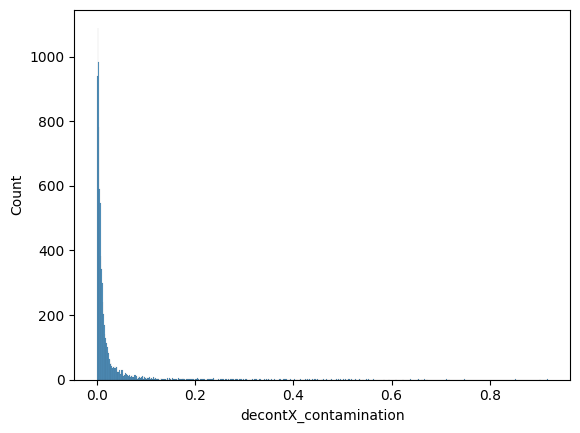

In [89]:
# plot histogram of adata.obs["decontX_contamination"]

p1 = sb.histplot(adata.obs["decontX_contamination"], kde=False)

In [90]:
# dataset should be filtered for doublets and debris acc to paper suppl. still apply it here and save uncorrected counts if needed
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

In [91]:
adata

AnnData object with n_obs × n_vars = 8867 × 17818
    obs: 'sample', 'symptoms', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [92]:
adata.write("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Pan/GSE155512_RAW/Pan_postQC.h5ad")

# Alsaigh et al. (GSE159677)

In [8]:
adata = sc.read_10x_mtx(
    '../data/Plaque-datasets/Alsaigh/outs-GSE159677_AGGREGATEMAPPED-tisCAR6samples_featurebcmatrixfiltered/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 

#adata.obs['dataset'] = 'Alsaigh_filtered'

In [10]:
# new .obs["sample"] column with sample id from barcode suffix
adata.obs["sample"] = [barcode.split("-")[1] for barcode in adata.obs.index]
adata

AnnData object with n_obs × n_vars = 51981 × 33538
    obs: 'sample'
    var: 'gene_ids', 'feature_types'

In [11]:
# only take samples 2, 4 and 6
adata = adata[adata.obs["sample"].isin(["2", "4", "6"])]
# rename samples to 1, 2, 3
adata.obs["sample"] = [str(int(sample) // 2) for sample in adata.obs["sample"]]
# include dataset column
adata.obs["dataset"] = "Alsaigh"
# include symptom column
adata.obs["symptoms"] = 'not stated'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_12798/3188958418.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["sample"] = [str(int(sample) // 2) for sample in adata.obs["sample"]]


In [12]:
adata

AnnData object with n_obs × n_vars = 39363 × 33538
    obs: 'sample', 'dataset', 'symptoms'
    var: 'gene_ids', 'feature_types'

Barcodes:<br>
Patient 1 PA scRNA-seq barcode -1 suffix<br>
Patient 1 AC scRNA-seq barcode -2 suffix<br>
Patient 2 PA scRNA-seq barcode -3 suffix<br>
Patient 2 AC scRNA-seq barcode -4 suffix<br>
Patient 3 PA scRNA-seq barcode -5 suffix<br>
Patient 3 AC scRNA-seq barcode -6 suffix<br>
<br>
AC: atherosclerotic core<br>
PA: proximally adjacent region

In [13]:
adata.write("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Alsaigh/Alsaigh.h5ad")

In [4]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [14]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Alsaigh/Alsaigh.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Alsaigh/Alsaigh_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [2]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Alsaigh/Alsaigh_postR.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 39363 × 33538
    obs: 'sample', 'dataset', 'symptoms', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    var: 'gene_ids', 'feature_types'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP'
    layers: 'decontXcounts'

In [4]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [5]:
print('Number of cells before filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes=200)  # according to paper
sc.pp.filter_cells(adata, max_genes = 4000)  # according to paper
sc.pp.filter_genes(adata, min_cells=3)


print('Number of cells before MT filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 10]  # according to paper
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Number of cells before filter: 39363
Number of cells before MT filter: 38688
Number of cells after MT filter: 34986


In [16]:
#results_file = "../data/Plaque-datasets/Alsaigh/alsaigh_pp.h5ad"

In [6]:
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

In [7]:
adata

AnnData object with n_obs × n_vars = 34986 × 22742
    obs: 'sample', 'dataset', 'symptoms', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [8]:
adata.write("../data/Plaque-datasets/Alsaigh/Alsaigh_postQC.h5ad")

# Dib et al. (GSE210152)

In [3]:
adata = sc.read_h5ad("../data/Plaque-datasets/Dib/GSE210152_raw.h5ad")

In [5]:
# new sample column with sample id from last digit of barcode
adata.obs["sample"] = [barcode[-1] for barcode in adata.obs.index]
# change sample 5 to 4, sample 6 to 5 and sample 7 to 6, but keep sample 1, 2 and 3
adata.obs["sample"] = [str(int(sample) - 1) if int(sample) > 3 else sample for sample in adata.obs["sample"]]


In [6]:
adata.obs["dataset"] = "Dib"

In [7]:
adata.obs.drop('patient', axis=1, inplace=True)

In [10]:
adata.write("../data/Plaque-datasets/Dib/Dib.h5ad")

In [12]:
adata.obs

,sample,dataset
barcode_id,,
CACTCCATCGACAGCC-P1,1,Dib
ATCATGGGTTGTCTTT-P1,1,Dib
ACAGCTAAGCCACCTG-P1,1,Dib
ACGCCAGCAAGACGTG-P1,1,Dib
GGTGAAGTCAGGCGAA-P1,1,Dib
...,...,...
CCGGTAGTCCACTGGG-P7,6,Dib
CGCTTCACAGGACCCT-P7,6,Dib
GACTAACCACGAGGTA-P7,6,Dib


In [9]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [13]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche//data/Plaque-datasets/Dib/Dib.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Dib/Dib_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [38]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Dib/Dib_postR.h5ad")

In [17]:
adata

AnnData object with n_obs × n_vars = 34456 × 36601
    obs: 'sample', 'dataset', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    var: 'gene_ids', 'feature_types'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [39]:
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

<Axes: xlabel='decontX_contamination', ylabel='Count'>

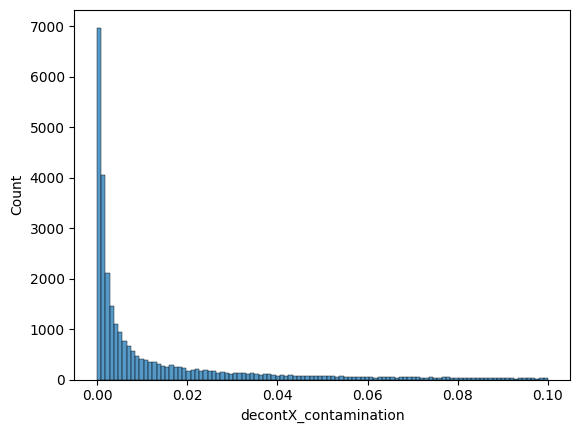

In [40]:
# plot histogram of adata.obs["decontX_contamination"]
sb.histplot(adata.obs["decontX_contamination"][adata.obs["decontX_contamination"]<0.1], kde=False)

In [41]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [19]:
adata

AnnData object with n_obs × n_vars = 34456 × 36601
    obs: 'sample', 'dataset', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

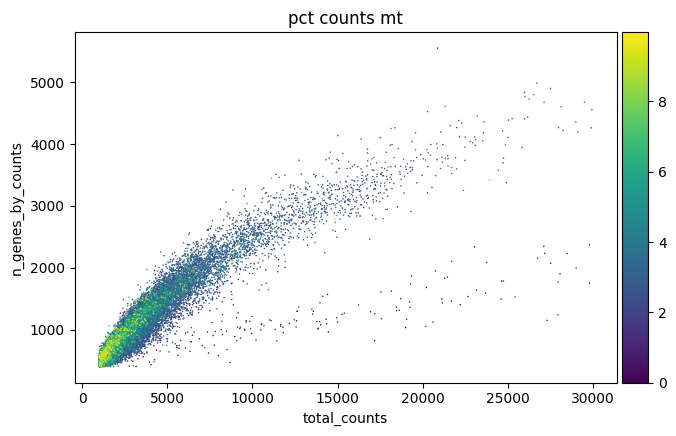

In [49]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [42]:
sc.pp.filter_cells(adata, min_genes=0)  
#sc.pp.filter_genes(adata, min_cells=3)

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


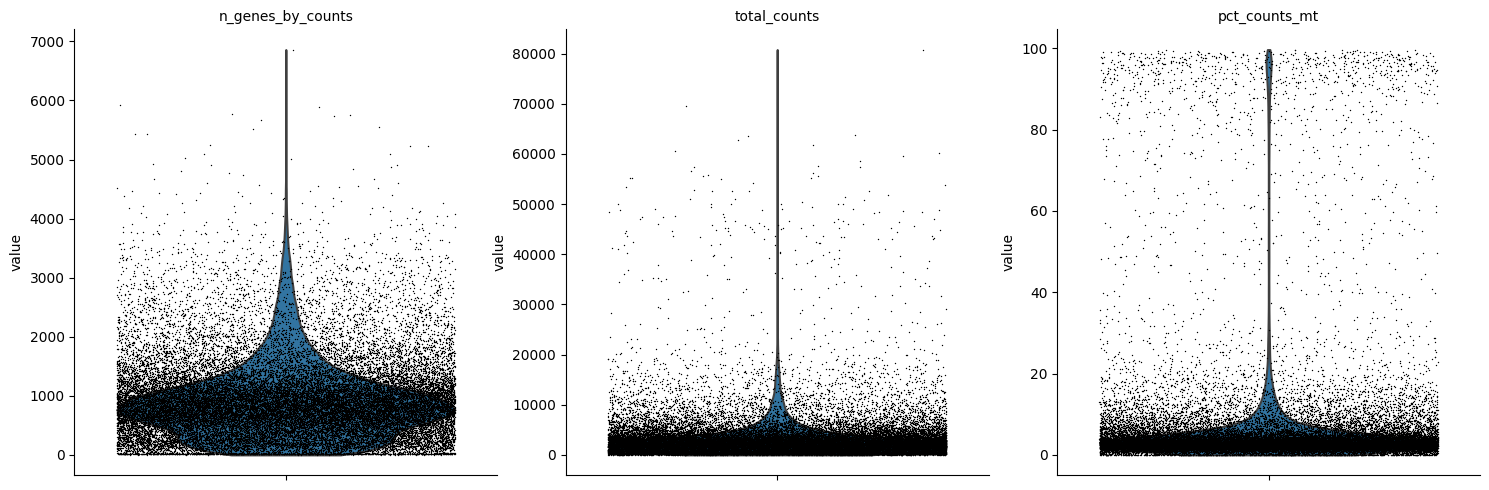

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

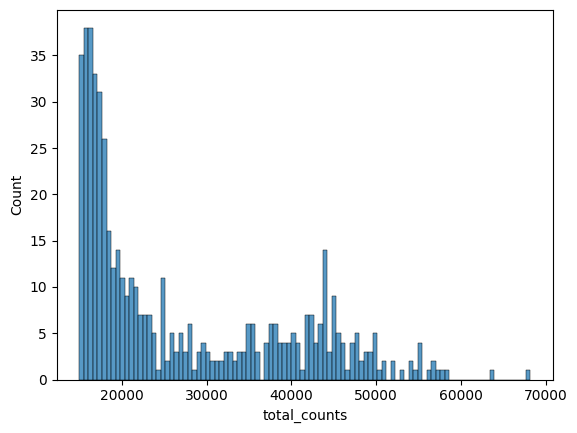

In [47]:
p1 = sb.histplot(adata.obs['total_counts'][adata.obs['total_counts']>15000], kde=False, bins=100)

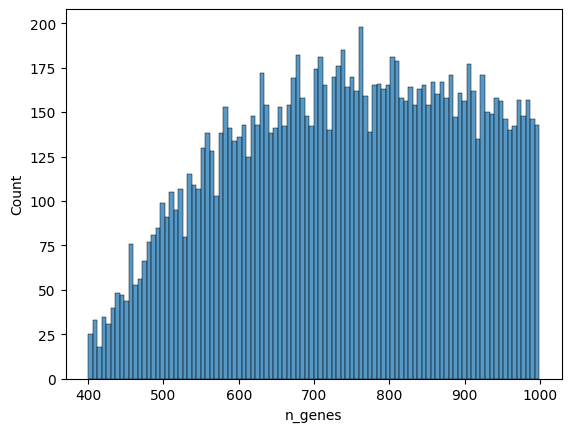

In [50]:
p1 = sb.histplot(adata.obs['n_genes'][adata.obs['n_genes']<1000], kde=False, bins=100)

In [48]:
# my own pp
print('Number of cells before gene filter: {:d}'.format(adata.n_obs))
sc.pp.filter_cells(adata, min_genes=400)  
sc.pp.filter_genes(adata, min_cells=3)

print('Number of cells before counts filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 1000)
sc.pp.filter_cells(adata, max_counts = 30000)

print('Number of cells beforeMT filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 10] 
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Number of cells before gene filter: 34456
Number of cells before counts filter: 26679
Number of cells beforeMT filter: 25597
Number of cells after MT filter: 25194


In [53]:
adata.obs['symptoms'] = 'not stated' # CHANGE IF AUTHOR REPLIES, see code cells below

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_14415/4219834629.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['symptoms'] = 'not stated' # CHANGE IF AUTHOR REPLIES


In [54]:
adata

AnnData object with n_obs × n_vars = 25194 × 21870
    obs: 'sample', 'dataset', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'symptoms'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [55]:
adata.write("../data/Plaque-datasets/Dib/Dib_postQC.h5ad")

In [3]:
# add symptoms as author provided via mail
adata = sc.read_h5ad("../data/Plaque-datasets/Dib/Dib_postQC.h5ad")
#Symptomatic	1
#Symptomatic	2
#Asymptomatic	3
#Asymptomatic	4
#Symptomatic	5
#Symptomatic	6

adata.obs['symptoms'] = ['SYM' if sample == '1' or sample == '2' or sample == '5' or sample == '6' else 'ASYM' for sample in adata.obs['sample']]

In [5]:
adata.obs

,sample,dataset,scDblFinder.sample,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,decontX_contamination,decontX_clusters,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,n_counts,symptoms
ATCATGGGTTGTCTTT-P1,1,Dib,1,doublet,0.996383,0.849239,0.944150,0.579212,1-2,2144,8158,221,2.708997,2144,8157,SYM
ACAGCTAAGCCACCTG-P1,1,Dib,1,doublet,0.999818,0.694620,0.986486,0.600160,1-2,2035,7292,227,3.113001,2035,7289,SYM
ACGCCAGCAAGACGTG-P1,1,Dib,1,singlet,0.001352,0.330606,0.029771,0.064581,1-2,3270,17223,583,3.385008,3270,17223,SYM
GGTGAAGTCAGGCGAA-P1,1,Dib,1,singlet,0.170927,0.273861,0.738597,0.052006,1-2,3201,15683,779,4.967162,3201,15683,SYM
GCAATCACATGACATC-P1,1,Dib,1,singlet,0.000184,0.186630,0.198159,0.011120,1-2,3099,15712,450,2.864053,3099,15712,SYM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGATCGGCACCAGATT-P7,6,Dib,6,singlet,0.270055,0.392247,0.124253,0.001379,6-2,437,1029,50,4.859086,437,1029,SYM
CTGAAACTCGCGTAGC-P7,6,Dib,6,singlet,0.000100,0.133563,0.010385,0.003261,6-2,455,1012,5,0.494071,455,1012,SYM
CCGTACTTCAAAGACA-P7,6,Dib,6,singlet,0.015433,0.422142,0.024591,0.006771,6-2,528,1011,6,0.593472,528,1011,SYM
GCATGCGCAGGGTATG-P7,6,Dib,6,singlet,0.066388,0.439753,0.047793,0.013070,6-2,533,1007,31,3.078451,533,1007,SYM


In [6]:
adata.write("../data/Plaque-datasets/Dib/Dib_postQC.h5ad")

# Slyz et al. (GSE234077)

## carotid

In [2]:
path = "../data/Plaque-datasets/Slysz/GSE234077_RAW/"

# List to store all AnnData objects
adata_list = []


for sample in ["1_2",3,4]:
    #print(sample)
    
    adata_sample = sc.read_10x_mtx(path + "Sample" + str(sample), var_names='gene_symbols')
    print("Number of cells in sample {}: {}".format(sample, len(adata_sample.obs)))
    # Update barcodes with sample ID
    adata_sample.obs_names = [barcode + "_" + str(sample) for barcode in adata_sample.obs_names]
    adata_sample.obs["sample"] = str(sample)
    adata_list.append(adata_sample)

# Concatenate all AnnData objects in the list without creating a new label
adata_final = anndata.concat(adata_list, join='outer', fill_value=0.0)

Number of cells in sample 1_2: 12394
Number of cells in sample 3: 10379
Number of cells in sample 4: 15358


In [5]:
adata_final.write("../data/Plaque-datasets/Slysz/Slysz.h5ad")

In [6]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [7]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Slysz/Slysz.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Slysz/Slysz_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [2]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Slysz/Slysz_postR.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 38131 × 36601
    obs: 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP'
    layers: 'decontXcounts'

mitochondrial reads < 10%, 200 < nCount_RNA < 10,000, and 200 < nFeature_RNA < 10,000

In [4]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

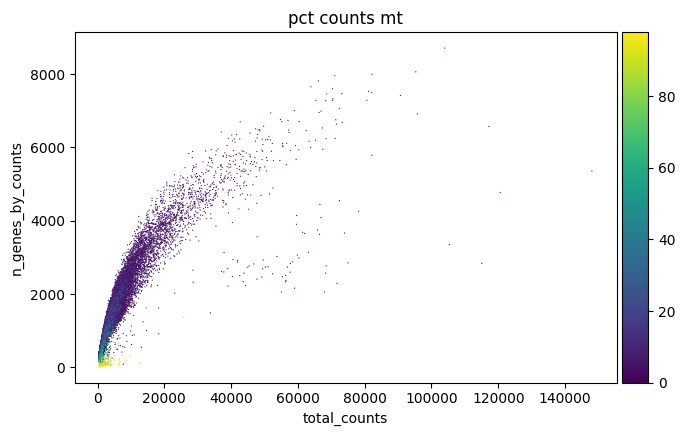

In [5]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [6]:
sc.pp.filter_cells(adata, min_genes=0) 

In [7]:
adata

AnnData object with n_obs × n_vars = 38131 × 36601
    obs: 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP'
    layers: 'decontXcounts'

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


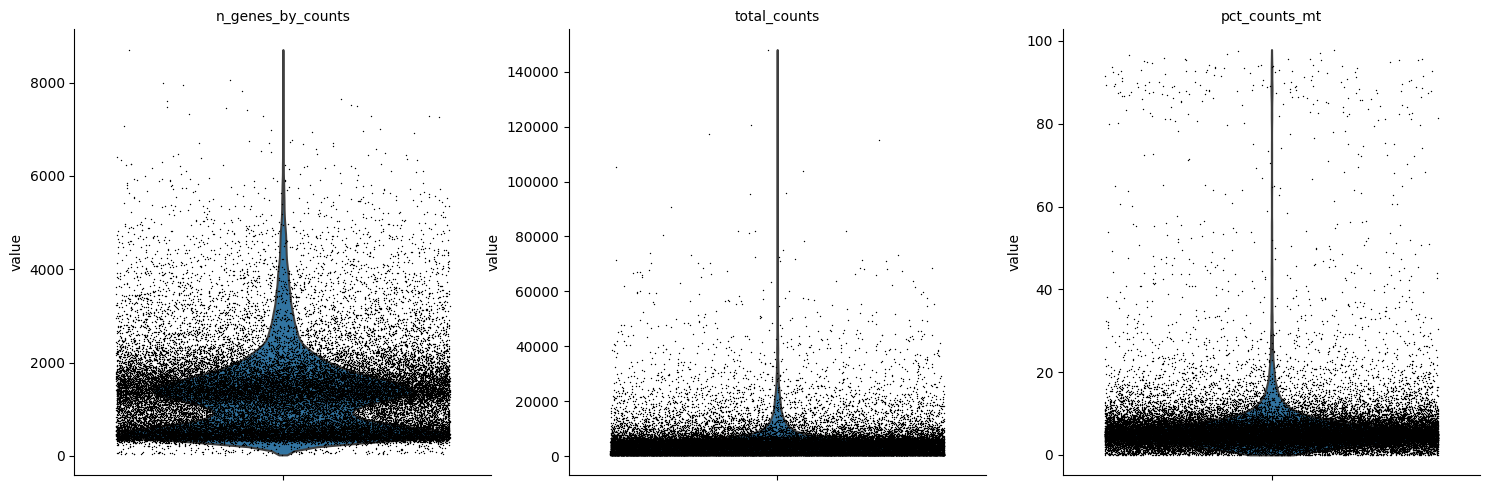

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

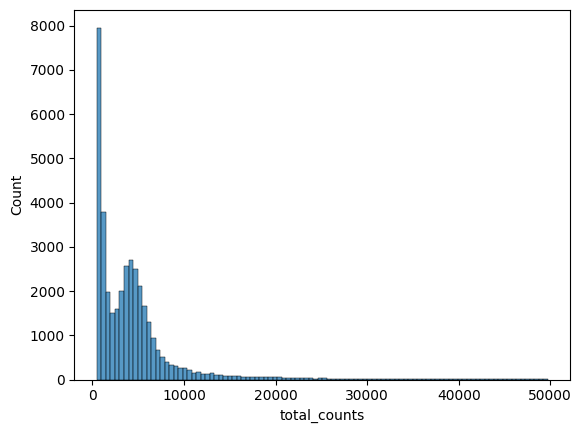

In [9]:
p1 = sb.histplot(adata.obs['total_counts'][adata.obs['total_counts']<50000], kde=False, bins=100)

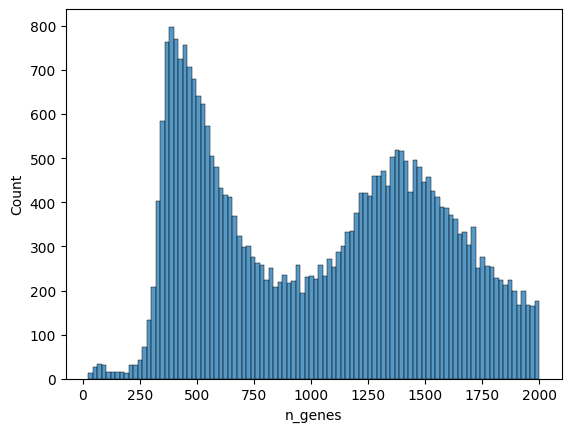

In [10]:
p1 = sb.histplot(adata.obs['n_genes'][adata.obs['n_genes']<2000], kde=False, bins = 100)

In [11]:
print('Number of cells before gene filter: {:d}'.format(adata.n_obs))
sc.pp.filter_cells(adata, min_genes=200)  # acc to paper
sc.pp.filter_cells(adata, max_genes = 10000) # according to paper
sc.pp.filter_genes(adata, min_cells=3)

print('Number of cells before counts filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 200) # acc to paper
sc.pp.filter_cells(adata, max_counts = 10000) # acc to paper

print('Number of cells beforeMT filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 10] # acc to paper
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Number of cells before gene filter: 38131
Number of cells before counts filter: 37953
Number of cells beforeMT filter: 34927
Number of cells after MT filter: 31115


In [12]:
adata.obs['dataset'] = 'Slysz'
adata.obs['symptoms'] = 'not stated'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_16078/3601475459.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['dataset'] = 'Slysz'


In [13]:
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

In [16]:
adata

AnnData object with n_obs × n_vars = 31115 × 24525
    obs: 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'dataset', 'symptoms'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_2_UMAP', 'decontX_3_UMAP', 'decontX_4_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [15]:
adata.write("../data/Plaque-datasets/Slysz/Slysz_postQC.h5ad")

## femoral

In [2]:
path = "../data/Plaque-datasets/Slysz/GSE234077_RAW/femoral/"

# List to store all AnnData objects
adata_list = []


for sample in ["1_2_3",4,5,6,7,8,9]:
    #print(sample)
    
    adata_sample = sc.read_10x_mtx(path + "Sample" + str(sample), var_names='gene_symbols')
    print("Number of cells in sample {}: {}".format(sample, len(adata_sample.obs)))
    # Update barcodes with sample ID
    adata_sample.obs_names = [barcode + "_" + str(sample) for barcode in adata_sample.obs_names]
    adata_sample.obs["sample"] = str(sample)
    adata_list.append(adata_sample)

# Concatenate all AnnData objects in the list without creating a new label
adata_final = anndata.concat(adata_list, join='outer', fill_value=0.0)

Number of cells in sample 1_2_3: 2444
Number of cells in sample 4: 4665
Number of cells in sample 5: 1734
Number of cells in sample 6: 9770
Number of cells in sample 7: 8422
Number of cells in sample 8: 11300
Number of cells in sample 9: 6655


In [3]:
adata_final.write("../data/Plaque-datasets/Slysz/Slysz_femoral.h5ad")

In [3]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [4]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Slysz/Slysz_femoral.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Slysz/Slysz_femoral_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [5]:
adata = sc.read_h5ad("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Slysz/Slysz_femoral_postR.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 44990 × 36601
    obs: 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_2_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP', 'decontX_7_UMAP', 'decontX_8_UMAP', 'decontX_9_UMAP'
    layers: 'decontXcounts'

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [8]:
print('Number of cells before gene filter: {:d}'.format(adata.n_obs))
sc.pp.filter_cells(adata, min_genes=200)  # acc to paper
sc.pp.filter_cells(adata, max_genes = 10000) # according to paper
sc.pp.filter_genes(adata, min_cells=3)

print('Number of cells before counts filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 200) # acc to paper
sc.pp.filter_cells(adata, max_counts = 10000) # acc to paper

print('Number of cells beforeMT filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 10] # acc to paper
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Number of cells before gene filter: 44990


Number of cells before counts filter: 43901
Number of cells beforeMT filter: 38620
Number of cells after MT filter: 35831


In [9]:
adata.obs['dataset'] = 'Slysz_femoral'
adata.obs['symptoms'] = 'not stated'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_81997/254070679.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['dataset'] = 'Slysz_femoral'


In [10]:
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

In [11]:
adata.write("../data/Plaque-datasets/Slysz/Slysz_femoral_postQC.h5ad")

In [12]:
adata

AnnData object with n_obs × n_vars = 35831 × 26071
    obs: 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'dataset', 'symptoms'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_2_3_UMAP', 'decontX_4_UMAP', 'decontX_5_UMAP', 'decontX_6_UMAP', 'decontX_7_UMAP', 'decontX_8_UMAP', 'decontX_9_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

# Jaiswal et al. (GSE179159)

In [2]:
adata = sc.read_text("../data/Plaque-datasets/Jaiswal/GSE179159_RAW/Sample1/GSM6976310_Fresh_ROB_2026.tsv")
adata = adata.transpose()
adata

AnnData object with n_obs × n_vars = 4763 × 36601

In [3]:
adata2 = sc.read_text("../data/Plaque-datasets/Jaiswal/GSE179159_RAW/Sample2/GSM6976312_Fresh_DTAN_4047.tsv")
adata2 = adata2.transpose()

In [4]:
adata_list = [adata, adata2]

In [5]:
adata_final = anndata.concat(adata_list, join='outer', fill_value=0.0)

In [6]:
adata_final

AnnData object with n_obs × n_vars = 6624 × 36601

In [7]:
# annotations
tsv_file = pd.read_csv("../data/Plaque-datasets/Jaiswal/GSE179159_all_samples_metadata.tsv", sep="\t")

In [8]:
tsv_file_carotid = tsv_file[tsv_file["Tissue"]=="Carotid"]

In [9]:
tsv_file_carotid_samples = tsv_file_carotid[tsv_file_carotid["Sample"].isin(["Fresh_ROB_2026", "Fresh_DTAN_4047"])]

In [10]:
tsv_file_carotid_samples

,Sample,Barcode,Status,Tissue,Cell_ID,chemistry,sum,detected,subsets_mt_sum,subsets_mt_detected,...,total,log_sum,log_detected,doublet_scores,label,monaco_celltypes,lm22_celltypes,Rough_celltype,Celltype,silhouette_width
10999,Fresh_ROB_2026,AAACCTGAGAGTACCG-1,Fresh,Carotid,Fresh_ROB_2026_AAACCTGAGAGTACCG-1,v2,1222,534,26,9,...,1222,10.255029,9.060696,0.10,5.0,Terminal effector CD8 T cells,T cells CD8,T-cells/NK cells,CD8+ T-cells,0.112634
11000,Fresh_ROB_2026,AAACCTGAGATATGGT-1,Fresh,Carotid,Fresh_ROB_2026_AAACCTGAGATATGGT-1,v2,2311,933,49,11,...,2311,11.174302,9.865733,0.14,8.0,Natural killer cells,NK cells resting,T-cells/NK cells,Active NK cells,0.139206
11001,Fresh_ROB_2026,AAACCTGAGGATGTAT-1,Fresh,Carotid,Fresh_ROB_2026_AAACCTGAGGATGTAT-1,v2,5172,1573,267,10,...,5172,12.336507,10.619303,0.50,4.0,Classical monocytes,Monocytes,Macrophages/cDCs,cDCs,0.241639
11002,Fresh_ROB_2026,AAACCTGCAGGAATCG-1,Fresh,Carotid,Fresh_ROB_2026_AAACCTGCAGGAATCG-1,v2,1675,919,155,10,...,1675,10.709945,9.843921,0.26,6.0,Classical monocytes,Monocytes,Macrophages/cDCs,Inflammatory macrophages,-0.008474
11003,Fresh_ROB_2026,AAACCTGGTACCTACA-1,Fresh,Carotid,Fresh_ROB_2026_AAACCTGGTACCTACA-1,v2,1139,619,10,7,...,1139,10.153552,9.273796,0.14,0.0,Terminal effector CD8 T cells,T cells CD8,T-cells/NK cells,CD8+ T-cells,0.076248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17618,Fresh_DTAN_4047,TTTGTCAAGGACTGGT-1,Fresh,Carotid,Fresh_DTAN_4047_TTTGTCAAGGACTGGT-1,v2,3269,1272,109,10,...,3269,11.674634,10.312883,1.88,5.0,Terminal effector CD8 T cells,T cells CD8,T-cells/NK cells,CD8+ T-cells,0.112209
17619,Fresh_DTAN_4047,TTTGTCAGTAGGCTGA-1,Fresh,Carotid,Fresh_DTAN_4047_TTTGTCAGTAGGCTGA-1,v2,4231,1207,126,10,...,4231,12.046783,10.237210,0.72,10.0,Th1/Th17 cells,T cells CD4 memory resting,T-cells/NK cells,CD4+ T-cells,0.183461
17620,Fresh_DTAN_4047,TTTGTCATCAACACAC-1,Fresh,Carotid,Fresh_DTAN_4047_TTTGTCATCAACACAC-1,v2,3326,1260,55,10,...,3326,11.699572,10.299208,0.54,5.0,Natural killer cells,NK cells resting,T-cells/NK cells,CD8+ T-cells,-0.289609
17621,Fresh_DTAN_4047,TTTGTCATCATAACCG-1,Fresh,Carotid,Fresh_DTAN_4047_TTTGTCATCATAACCG-1,v2,2880,1003,91,10,...,2880,11.491853,9.970106,0.16,2.0,Naive B cells,B cells naïve,B-cells,B-cells,0.326130


In [11]:
# dict with barcodes as keys and Rough_celltype as values
barcode_to_celltype = dict(zip(tsv_file_carotid_samples["Barcode"], tsv_file_carotid_samples["Celltype"]))

In [12]:
barcode_to_celltype

{'AAACCTGAGAGTACCG-1': 'CD8+ T-cells',
 'AAACCTGAGATATGGT-1': 'Active NK cells',
 'AAACCTGAGGATGTAT-1': 'cDCs',
 'AAACCTGCAGGAATCG-1': 'Inflammatory macrophages',
 'AAACCTGGTACCTACA-1': 'CD8+ T-cells',
 'AAACCTGGTTAAGGGC-1': 'Plasmacytoid DCs',
 'AAACCTGGTTGAGTTC-1': 'CD4+ T-cells',
 'AAACCTGGTTGCTCCT-1': 'Removed by QC',
 'AAACCTGTCACCGTAA-1': 'Removed by QC',
 'AAACCTGTCCAGAGGA-1': 'Resting NK cells',
 'AAACCTGTCTGTGCAA-1': 'Inflammatory macrophages',
 'AAACCTGTCTTAGAGC-1': 'CD8+ T-cells',
 'AAACGGGAGATCTGAA-1': 'CD4+ T-cells',
 'AAACGGGAGCCAGTTT-1': 'CD4+ T-cells',
 'AAACGGGAGCTAGTGG-1': 'Inflammatory macrophages',
 'AAACGGGAGTTGTAGA-1': 'Foam cells',
 'AAACGGGCAAGCTGAG-1': 'Active NK cells',
 'AAACGGGGTATCTGCA-1': 'CD8+ T-cells',
 'AAACGGGGTTAGAACA-1': 'CD8+ T-cells',
 'AAACGGGTCAAGGTAA-1': 'CD4+ T-cells',
 'AAACGGGTCACCTCGT-1': 'Basophils',
 'AAACGGGTCATATCGG-1': 'CD8+ T-cells',
 'AAACGGGTCCAACCAA-1': 'CD4+ T-cells',
 'AAAGATGAGCAATCTC-1': 'Inflammatory macrophages',
 'AAAGATGAGCC

In [13]:
tsv_file_carotid_samples["Celltype"].value_counts()

Celltype
CD4+ T-cells                1906
CD8+ T-cells                1766
Removed by QC                987
Foam cells                   518
Inflammatory macrophages     344
Active NK cells              312
Resting NK cells             185
B-cells                      138
cDCs                         124
Plasmacytoid DCs             102
MHC-hi macrophages            74
CD16+ monocytes               46
LYVE1+ TR macrophages         45
Plasma cells                  39
Basophils                     38
Name: count, dtype: int64

In [14]:
# go through all barcodes and add cell type to adata.obs
# Convert the dictionary to a pandas Series
s = pd.Series(barcode_to_celltype)

# Assuming your anndata object is named 'adata'
adata_final.obs['cell_type'] = adata_final.obs_names.map(lambda x: x.split("_")[-1]).map(s)


In [15]:
adata_final.obs

,cell_type
Fresh_ROB_2026_AAACCTGAGAGTACCG-1,CD8+ T-cells
Fresh_ROB_2026_AAACCTGAGATATGGT-1,Active NK cells
Fresh_ROB_2026_AAACCTGAGGATGTAT-1,cDCs
Fresh_ROB_2026_AAACCTGCAGGAATCG-1,Inflammatory macrophages
Fresh_ROB_2026_AAACCTGGTACCTACA-1,CD8+ T-cells
...,...
Fresh_DTAN_4047_TTTGTCAAGGACTGGT-1,CD8+ T-cells
Fresh_DTAN_4047_TTTGTCAGTAGGCTGA-1,CD4+ T-cells
Fresh_DTAN_4047_TTTGTCATCAACACAC-1,CD8+ T-cells
Fresh_DTAN_4047_TTTGTCATCATAACCG-1,B-cells


In [16]:
# remove cells that have "Removed by QC" as cell_type
adata_final = adata_final[adata_final.obs["cell_type"]!="Removed by QC"]

In [17]:
adata_final

View of AnnData object with n_obs × n_vars = 5636 × 36601
    obs: 'cell_type'

In [18]:
adata_final.obs['dataset'] = 'Jaiswal'
adata_final.obs['symptoms'] = 'not stated'

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_16279/2828727151.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_final.obs['dataset'] = 'Jaiswal'


### Use fernandez barcodes to match ensemble barcodes

In [19]:
gene_ids_fernandez = pd.read_csv("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Fernandez/GSE224273/GSE224273_RAW/Sample1/genes.tsv", sep="\t", header=None)
# make column 0 the index
gene_ids_fernandez.set_index(0, inplace=True)
#rename column 1 to gene_symbol
gene_ids_fernandez.rename(columns={1: "gene_symbol"}, inplace=True)

In [20]:
gene_ids_new = []

count = 0

for ENSGname in adata_final.var_names:
    count += 1
    print(count)
    if ENSGname in gene_ids_fernandez.index:
        hgnc_symbol = gene_ids_fernandez.loc[ENSGname]['gene_symbol']
        gene_ids_new.append(hgnc_symbol)
    else:
        gene_ids_new.append("not_found")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [21]:
gene_ids_new.count("not_found")

4250

In [22]:
# replace var_names with gene_ids
adata_final.var_names = gene_ids_new

In [23]:
# remove gene names that are not found
adata_final = adata_final[:, adata_final.var_names != "not_found"]

In [24]:
adata_final

View of AnnData object with n_obs × n_vars = 5636 × 32351
    obs: 'cell_type', 'dataset', 'symptoms'

In [25]:
# 1. Identify duplicate gene names
duplicate_genes = adata_final.var_names[adata_final.var_names.duplicated()].unique()
# 2. Sum the counts of duplicate genes across all cells
for gene in duplicate_genes:
    # Find all indices of this gene
    indices = [i for i, name in enumerate(adata_final.var_names) if name == gene]
    
    # Sum counts across all cells for these indices
    adata_final[:, indices[0]].X += adata_final[:, indices[1]].X

    # Remove the duplicate gene (excluding the first occurrence)
    adata_final = adata_final[:, [i for i in range(adata_final.n_vars) if i != indices[1]]]


In [26]:
# should be empty
duplicate_genes = adata_final.var_names[adata_final.var_names.duplicated()].unique()

In [27]:
# add sample column with sample 1 if 6th element of barcode is R, else sample 2
adata_final.obs["sample"] = ["1" if barcode[6]=="R" else "2" for barcode in adata_final.obs_names]

/var/folders/s5/3jq6kdq963b44s2lmrc_2fd40000gn/T/ipykernel_16279/3435742143.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_final.obs["sample"] = ["1" if barcode[6]=="R" else "2" for barcode in adata_final.obs_names]


In [28]:
adata_final

AnnData object with n_obs × n_vars = 5636 × 32338
    obs: 'cell_type', 'dataset', 'symptoms', 'sample'

In [29]:
adata_final.write("../data/Plaque-datasets/Jaiswal/Jaiswal.h5ad")

In [30]:
adata = sc.read_h5ad("../data/Plaque-datasets/Jaiswal/Jaiswal.h5ad")

In [31]:
# Start with doublet removal and ambient RNA correction
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
import scanpy as sc

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [32]:
%%R 
library(celda)
library(zellkonverter)
library(SummarizedExperiment)
library(scDblFinder)
sce = readH5AD("/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Jaiswal/Jaiswal.h5ad")
samples = sce$sample
assays(sce)$counts <- assays(sce)$X
assays(sce)$X <- NULL
sce1 <- scDblFinder(sce, samples=samples)
sce2 <- decontX(sce1, batch = samples)
sce_adata <- writeH5AD(sce2, file="/Users/korbinian.traeuble/PhD-local/projects/main_Roche/data/Plaque-datasets/Jaiswal/Jaiswal_postR.h5ad")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Lade nötiges Paket: SingleCellExperiment
Lade nötiges Paket: SummarizedExperiment
Lade nötiges Paket: MatrixGenerics
Lade nötiges Paket: matrixStats

Attache Paket: ‘MatrixGenerics’

Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQua

In [40]:
adata = sc.read_h5ad("../data/Plaque-datasets/Jaiswal/Jaiswal_postR.h5ad")

In [41]:
adata

AnnData object with n_obs × n_vars = 5636 × 32338
    obs: 'cell_type', 'dataset', 'symptoms', 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP'
    layers: 'decontXcounts'

In [42]:
adata.layers["uncorrected_counts"] = adata.X.copy()
adata.layers["raw_decontXcounts"] = adata.layers["decontXcounts"].copy()
adata.X = np.around(adata.layers["raw_decontXcounts"].copy()).astype(int)
del adata.layers["decontXcounts"]

In [43]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

### preprocess data

In [52]:
sc.pp.filter_cells(adata, min_genes=0)

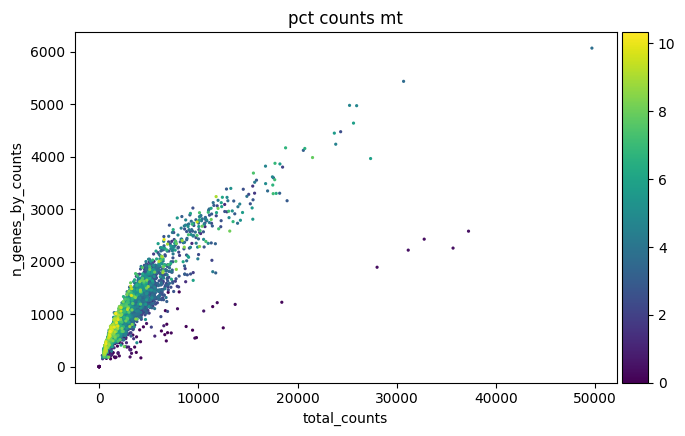

In [59]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

/Users/korbinian.traeuble/miniconda3/envs/py39main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


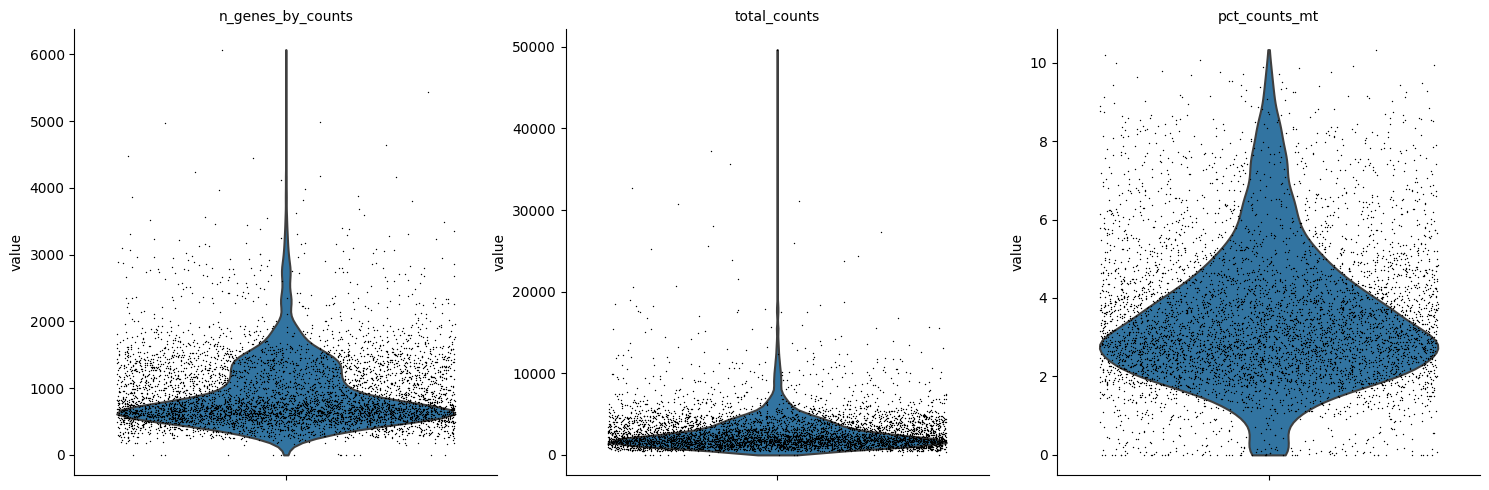

In [45]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

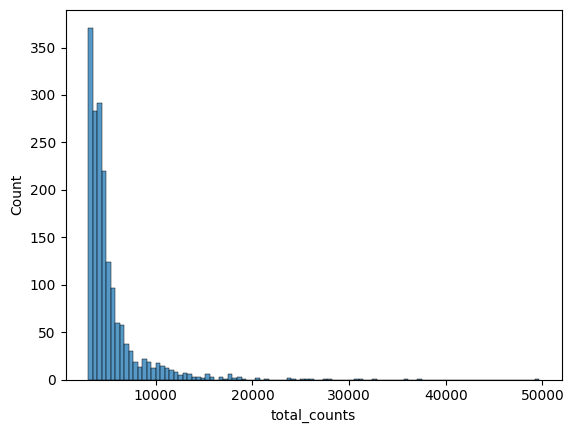

In [56]:
p1 = sb.histplot(adata.obs['total_counts'][adata.obs['total_counts']>3000], kde=False, bins=100)

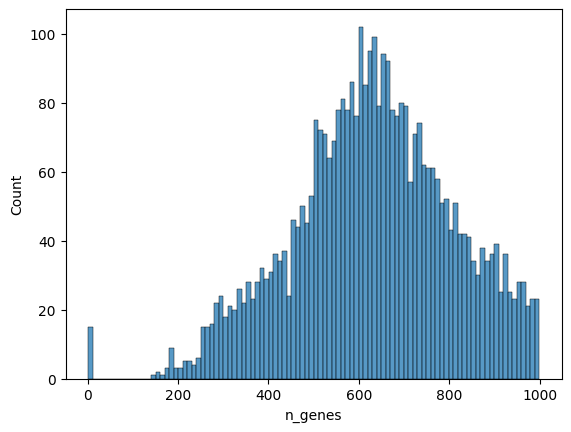

In [58]:
p1 = sb.histplot(adata.obs['n_genes'][adata.obs['n_genes']<1000], kde=False, bins=100)

In [60]:
# my own pp
print('Number of cells before gene filter: {:d}'.format(adata.n_obs))
sc.pp.filter_cells(adata, min_genes=200)  
sc.pp.filter_genes(adata, min_cells=3)

print('Number of cells before counts filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 500)
sc.pp.filter_cells(adata, max_counts = 40000)

print('Number of cells beforeMT filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['pct_counts_mt'] < 10] # already applied somehow
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Number of cells before gene filter: 5636
Number of cells before counts filter: 5602
Number of cells beforeMT filter: 5571
Number of cells after MT filter: 5567


In [63]:
adata

View of AnnData object with n_obs × n_vars = 5567 × 16870
    obs: 'cell_type', 'dataset', 'symptoms', 'sample', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'decontX_contamination', 'decontX_clusters', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'X_name', 'decontX', 'scDblFinder.threshold'
    obsm: 'decontX_1_UMAP', 'decontX_2_UMAP'
    layers: 'uncorrected_counts', 'raw_decontXcounts'

In [64]:
adata.write("../data/Plaque-datasets/Jaiswal/Jaiswal_postQC.h5ad")

# Bashore et al. (GSE253904) for automated cell type annotation

In [13]:
# CITE-seq samples: 5,7,8,10,11,12
# scRNA-seq samples: 4,6,9,13,14,15,16,17,18,19,20,21

path = "../data/Plaque-datasets/Bashore/GSE253904_RAW/"


# List to store all AnnData objects
adata_list = []

for sample in ["4","6","9","13","14","15","16","17","18","19","20","21","5","7","8","10","11","12"]:
    #print(sample)
    
    adata_sample = sc.read_10x_mtx(path + "Sample" + str(sample), var_names='gene_symbols')
    print("Number of cells in sample {}: {}".format(sample, len(adata_sample.obs)))
    # Update barcodes with sample ID
    adata_sample.obs_names = [barcode + "_" + str(sample) for barcode in adata_sample.obs_names]
    adata_sample.obs["sample"] = str(sample)
    adata_list.append(adata_sample)

# Concatenate all AnnData objects in the list without creating a new label
adata_final = anndata.concat(adata_list, join='outer', fill_value=0.0)

Number of cells in sample 4: 2715
Number of cells in sample 6: 6691
Number of cells in sample 9: 5432
Number of cells in sample 13: 3543
Number of cells in sample 14: 4335
Number of cells in sample 15: 5147
Number of cells in sample 16: 5648
Number of cells in sample 17: 6299
Number of cells in sample 18: 4843
Number of cells in sample 19: 4937
Number of cells in sample 20: 2316
Number of cells in sample 21: 3810
Number of cells in sample 5: 2143
Number of cells in sample 7: 4673
Number of cells in sample 8: 5912
Number of cells in sample 10: 4368
Number of cells in sample 11: 4473
Number of cells in sample 12: 4657


In [14]:
adata_final

AnnData object with n_obs × n_vars = 81942 × 36601
    obs: 'sample'

In [15]:
adata_final.var['mt'] = adata_final.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_final, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [16]:
sc.pp.filter_cells(adata_final, min_genes=0) # to get n_genes

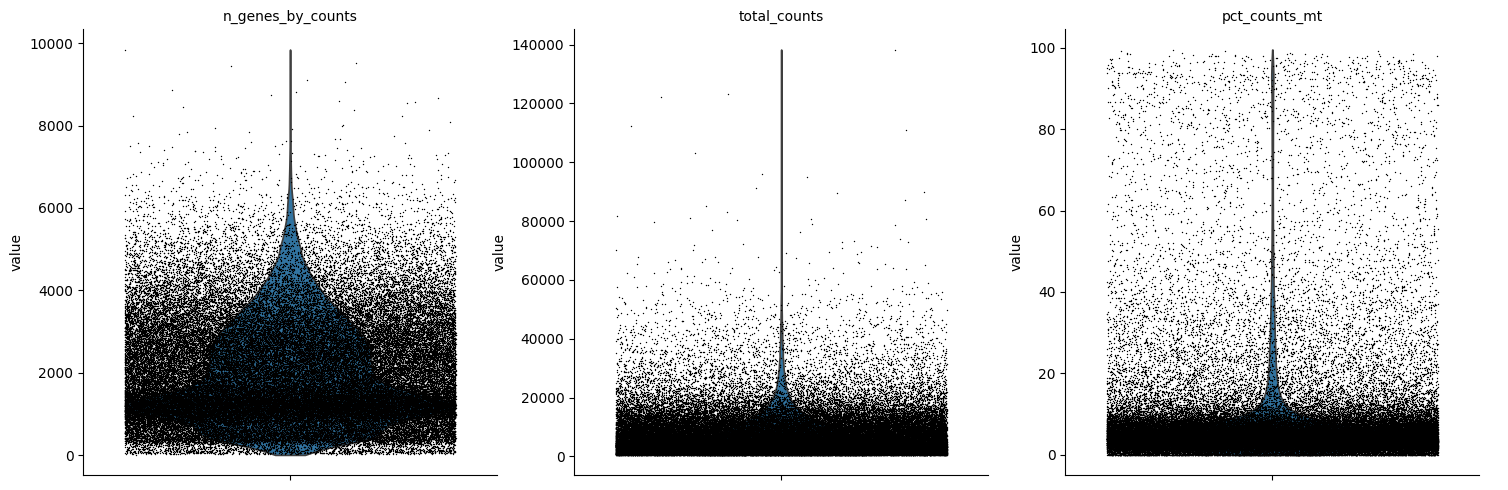

In [17]:
sc.pl.violin(adata_final, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [18]:
# my own pp
print('Number of cells before gene filter: {:d}'.format(adata_final.n_obs))
sc.pp.filter_cells(adata_final, min_genes=200)  #acc to author
sc.pp.filter_cells(adata_final, max_genes=6000) # acc to author
sc.pp.filter_genes(adata_final, min_cells=3) #acc to author

print('Number of cells before counts filter: {:d}'.format(adata_final.n_obs))

sc.pp.filter_cells(adata_final, max_counts = 40000) #acc to author


print('Number of cells beforeMT filter: {:d}'.format(adata_final.n_obs))

adata_final = adata_final[adata_final.obs['pct_counts_mt'] < 30] #acc to author
print('Number of cells after MT filter: {:d}'.format(adata_final.n_obs))


Number of cells before gene filter: 81942
Number of cells before counts filter: 80265
Number of cells beforeMT filter: 79837
Number of cells after MT filter: 77112


In [22]:
adata_final.obs["dataset"] = "Bashore"

/var/folders/86/48x8hyh92n373fcbwfzyx2_w0000gn/T/ipykernel_51964/3426492910.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_final.obs["dataset"] = "Bashore"


In [23]:
adata_final.write("../data/Plaque-datasets/Bashore/Bashore_postQC_noCITE_noR.h5ad")

In [2]:
#now CITEseq

# CITE-seq samples: 5,7,8,10,11,12
# scRNA-seq samples: 4,6,9,13,14,15,16,17,18,19,20,21

path = "../data/Plaque-datasets/Bashore/GSE253904_RAW/"


# List to store all AnnData objects
adata_list = []

for sample in ["5","7","8","10","11","12"]:
    #print(sample)
    
    adata_sample = sc.read_10x_mtx(path + "Sample" + str(sample), var_names='gene_symbols', gex_only=False)
    print("Number of cells in sample {}: {}".format(sample, len(adata_sample.obs)))
    # Update barcodes with sample ID
    adata_sample.obs_names = [barcode + "_" + str(sample) for barcode in adata_sample.obs_names]
    adata_sample.obs["sample"] = str(sample)
    adata_list.append(adata_sample)

# Concatenate all AnnData objects in the list without creating a new label
adata_final = anndata.concat(adata_list, join='outer', fill_value=0.0)

Number of cells in sample 5: 2143
Number of cells in sample 7: 4673
Number of cells in sample 8: 5912
Number of cells in sample 10: 4368
Number of cells in sample 11: 4473
Number of cells in sample 12: 4657


In [5]:
# only keep the vars that end with "_ADT"
adata_final = adata_final[:, adata_final.var_names.str.endswith("_ADT")]

In [8]:
adata_final

View of AnnData object with n_obs × n_vars = 26226 × 283
    obs: 'sample'

In [11]:
# remove the last 4 digtis of the adata_final.var
adata_final.var_names = [var[:-4] for var in adata_final.var_names]

In [13]:
adata_final.write("../data/Plaque-datasets/Bashore/Bashore_onlyCITE.h5ad")